In [2]:
import numpy as np
import pandas as pd 
import cmath 
import glob
import scipy.special as sp
import scipy.signal as spg
import scipy.constants as const
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['legend.fontsize'] = 8
import VNA_data_read_local as vdr
import useful_functions as uf

#baseline1 = 'broadband_baseline1_0.08to10GHz_2025-06-06_12-47-56.txt'

In [3]:
broadband_0606 = glob.glob('/Users/leayamashiro/whispering_gallery_MAIN/calibrated/data/060625/USB/*.txt')

In [5]:
broadband_0606

['/Users/leayamashiro/whispering_gallery_MAIN/calibrated/data/060625/USB/USB_rot3_2.5mm_6.18to9.86GHz_2025-06-06_17-27-15.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/calibrated/data/060625/USB/USB_baseline6_6.18to9.86GHz_2025-06-06_17-39-03.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/calibrated/data/060625/USB/USB_rot1_1mm_6.18to9.86GHz_2025-06-06_17-07-58.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/calibrated/data/060625/USB/USB_rot3_1mm_6.18to9.86GHz_2025-06-06_17-25-56.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/calibrated/data/060625/USB/USB_baseline2_6.18to9.86GHz_2025-06-06_16-49-27.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/calibrated/data/060625/USB/USB_baseline1_6.18to9.86GHz_2025-06-06_16-48-14.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/calibrated/data/060625/USB/USB_rot1_Sub_mm_6.18to9.86GHz_2025-06-06_17-05-49.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/calibrated/data/060625/USB/USB_rot1_flipped_2.5mm_6.18to9.86GHz_

In [40]:
baseline1 = 'USB_baseline1_6.18to9.86GHz_2025-06-06_16-48-14.txt'
baseline2 = 'USB_baseline2_6.18to9.86GHz_2025-06-06_16-49-27.txt'
baseline3 = 'USB_baseline3_6.18to9.86GHz_2025-06-06_16-50-44.txt'
baseline4 = 'USB_baseline4_6.18to9.86GHz_2025-06-06_17-37-08.txt'
baseline5 = 'USB_baseline5_6.18to9.86GHz_2025-06-06_17-38-05.txt'
baseline6 = 'USB_baseline3_6.18to9.86GHz_2025-06-06_16-50-44.txt'

folder_path = '/Users/leayamashiro/whispering_gallery_MAIN/calibrated/data/060625/USB/'
folder_for_plotter = 'calibrated/data/060625/USB'

# rotation 1
rot1_sb1 = 'USB_rot1_Sub_mm_6.18to9.86GHz_2025-06-06_17-05-49.txt'
rot1_1mm = 'USB_rot1_1mm_6.18to9.86GHz_2025-06-06_17-07-58.txt'
rot1_2p5mm = 'USB_rot1_2.5mm_6.18to9.86GHz_2025-06-06_17-11-15.txt'

# rotation 3 
rot3_sb1 = 'USB_rot3_Sub_mm_6.18to9.86GHz_2025-06-06_17-17-35.txt'
rot3_1mm = 'USB_rot3_1mm_6.18to9.86GHz_2025-06-06_17-25-56.txt'
rot3_2p5mm = 'USB_rot3_2.5mm_6.18to9.86GHz_2025-06-06_17-27-15.txt'

# rotation 1, flipped

rot1fl_sb1 = 'USB_rot1_flipped_Sub_mm_6.18to9.86GHz_2025-06-06_17-32-07.txt'
rot1fl_1mm = 'USB_rot1_flipped_1mm_6.18to9.86GHz_2025-06-06_17-33-54.txt'
rot1fl_2p5mm = 'USB_rot1_flipped_2.5mm_6.18to9.86GHz_2025-06-06_17-36-08.txt'


In [11]:
BL1 = uf.just_single_loader(folder_path + baseline1)
BL2 = uf.just_single_loader(folder_path + baseline2)
BL3 = uf.just_single_loader(folder_path + baseline3)
BL4 = uf.just_single_loader(folder_path + baseline4)
BL5 = uf.just_single_loader(folder_path + baseline5)
BL6 = uf.just_single_loader(folder_path + baseline6)

In [12]:
BL1

Unnamed: 0     Freq (Hz)   Complex (decimal)
0              0  6.180000e+09  0.152405+0.142212j
1              1  6.182300e+09  0.155716+0.140778j
2              2  6.184600e+09  0.157318+0.139237j
3              3  6.186900e+09  0.160080+0.139450j
4              4  6.189200e+09  0.161575+0.137482j
...          ...           ...                 ...
1596        1596  9.850800e+09 -0.207031-0.277557j
1597        1597  9.853100e+09 -0.207199-0.272064j
1598        1598  9.855400e+09 -0.208695-0.269791j
1599        1599  9.857700e+09 -0.210297-0.265991j
1600        1600  9.860000e+09 -0.207581-0.261246j

[1601 rows x 3 columns]

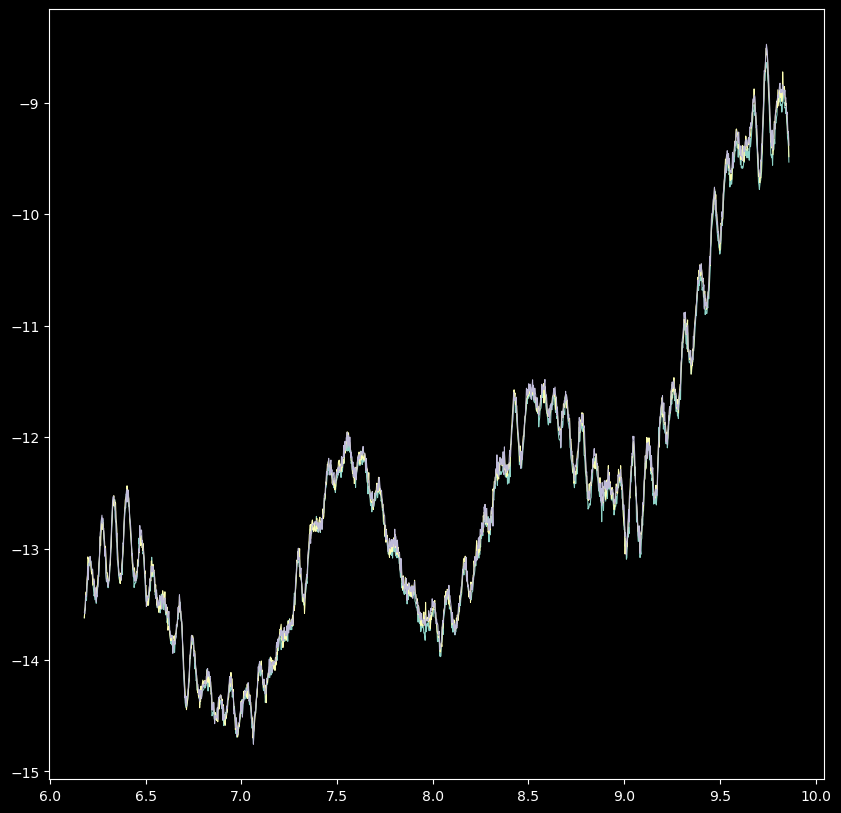

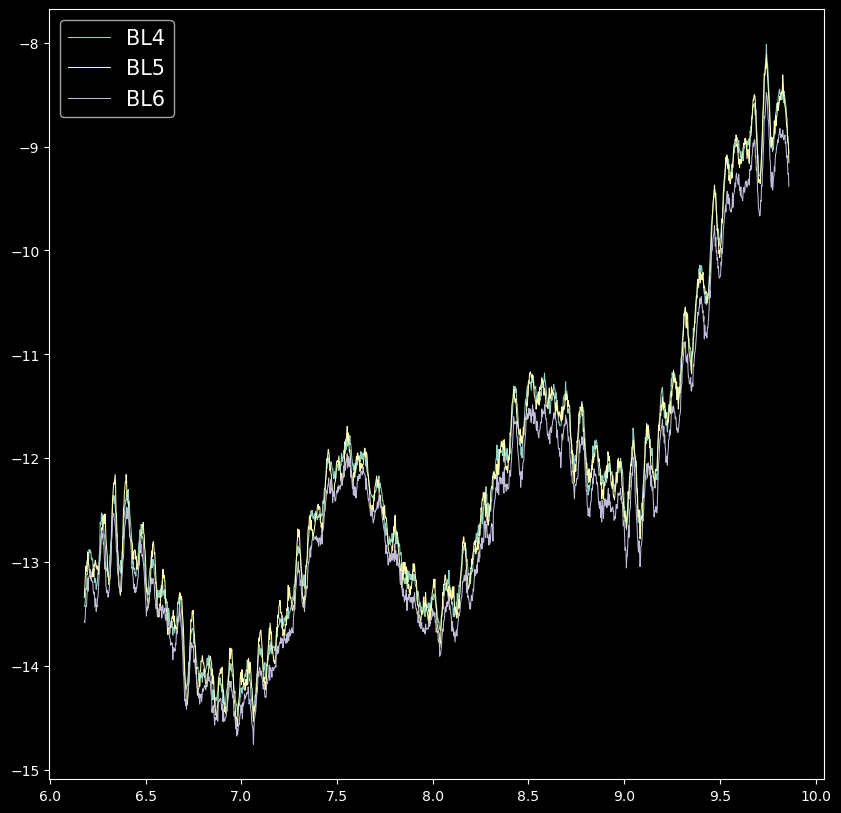

In [26]:
plt.figure(figsize = (10,10))
plt.plot(BL1['Freq (Hz)']/1e9, 20*np.log10(np.abs(BL1['Complex (decimal)'])), label = 'BL1', lw=0.75)
plt.plot(BL2['Freq (Hz)']/1e9, 20*np.log10(np.abs(BL2['Complex (decimal)'])), label = 'BL2', lw=0.75)
plt.plot(BL3['Freq (Hz)']/1e9, 20*np.log10(np.abs(BL3['Complex (decimal)'])), label = 'BL3', lw=0.75)
plt.figure(figsize = (10,10))
plt.plot(BL4['Freq (Hz)']/1e9, 20*np.log10(np.abs(BL4['Complex (decimal)'])), label = 'BL4', lw=0.75)
plt.plot(BL5['Freq (Hz)']/1e9, 20*np.log10(np.abs(BL5['Complex (decimal)'])), label = 'BL5', lw=0.75)
plt.plot(BL6['Freq (Hz)']/1e9, 20*np.log10(np.abs(BL6['Complex (decimal)'])), label = 'BL6', lw=0.75)
plt.legend()

In [20]:
baselines_averaged = (BL1 + BL2 + BL3 + BL4 + BL5 + BL6)/6

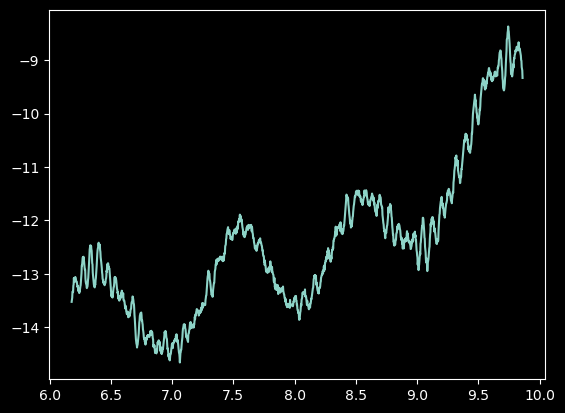

In [21]:
plt.plot(baselines_averaged['Freq (Hz)']/1e9, 20*np.log10(np.abs(baselines_averaged['Complex (decimal)'])), label = 'BL6')

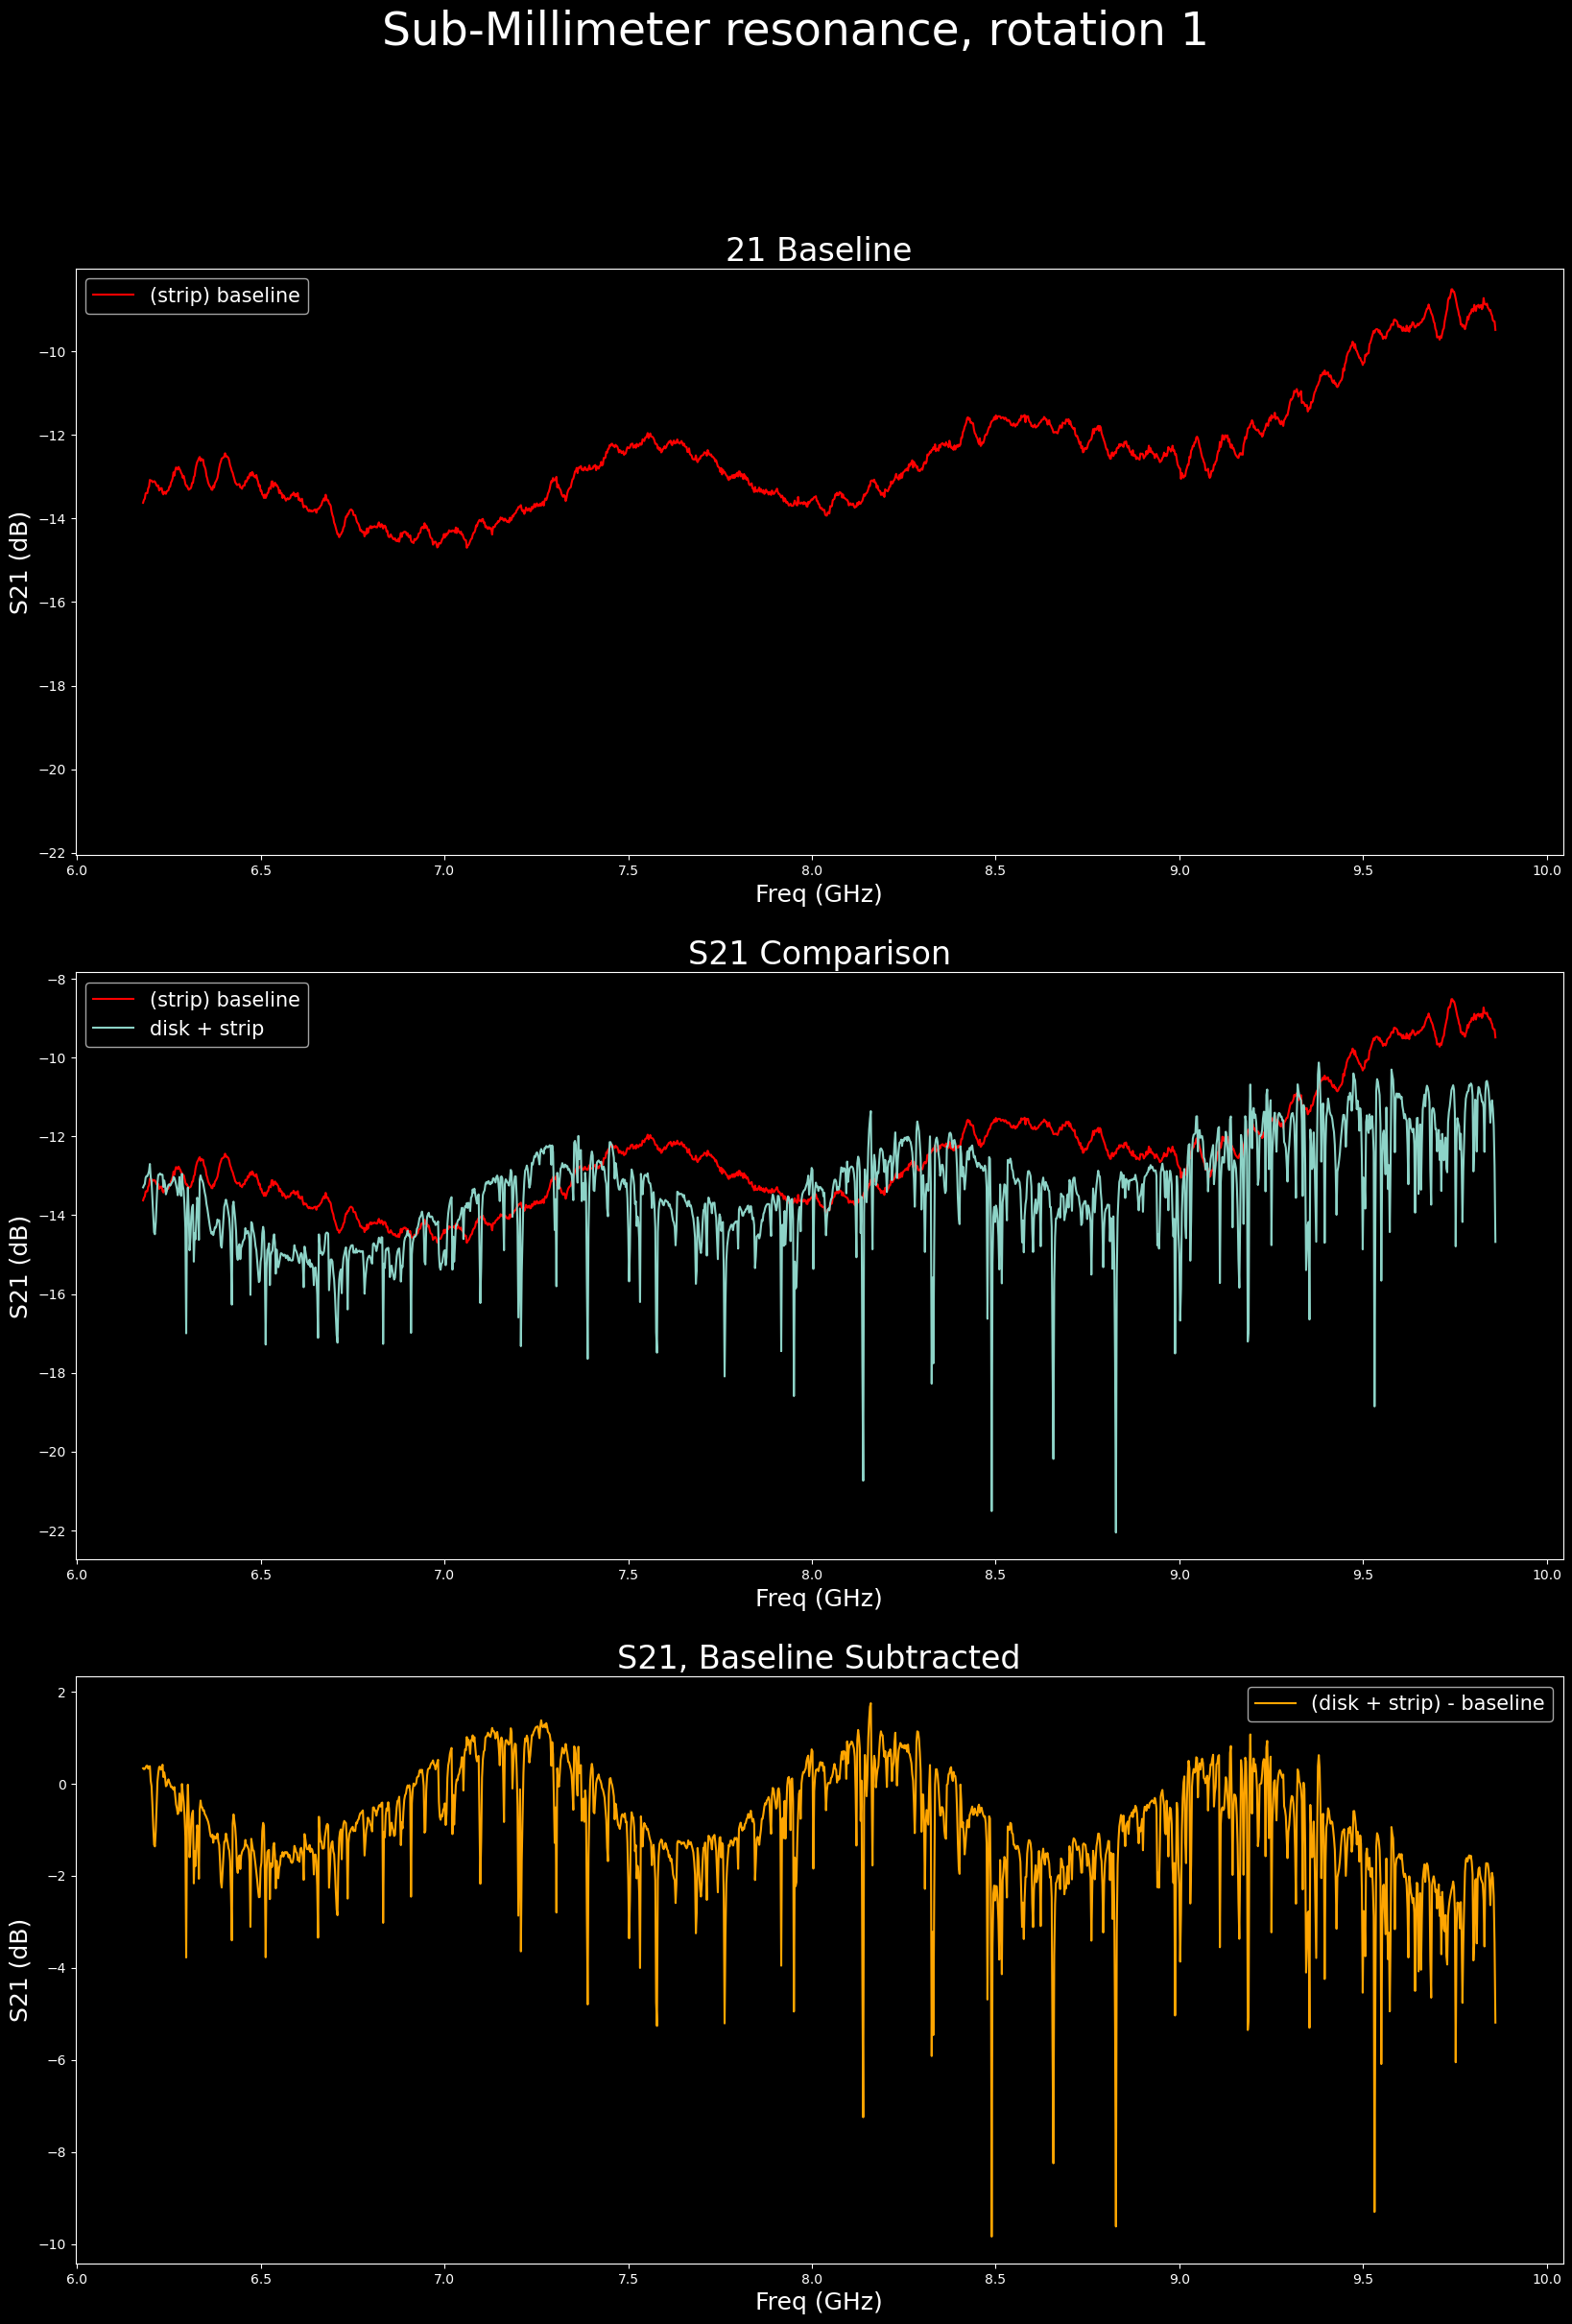

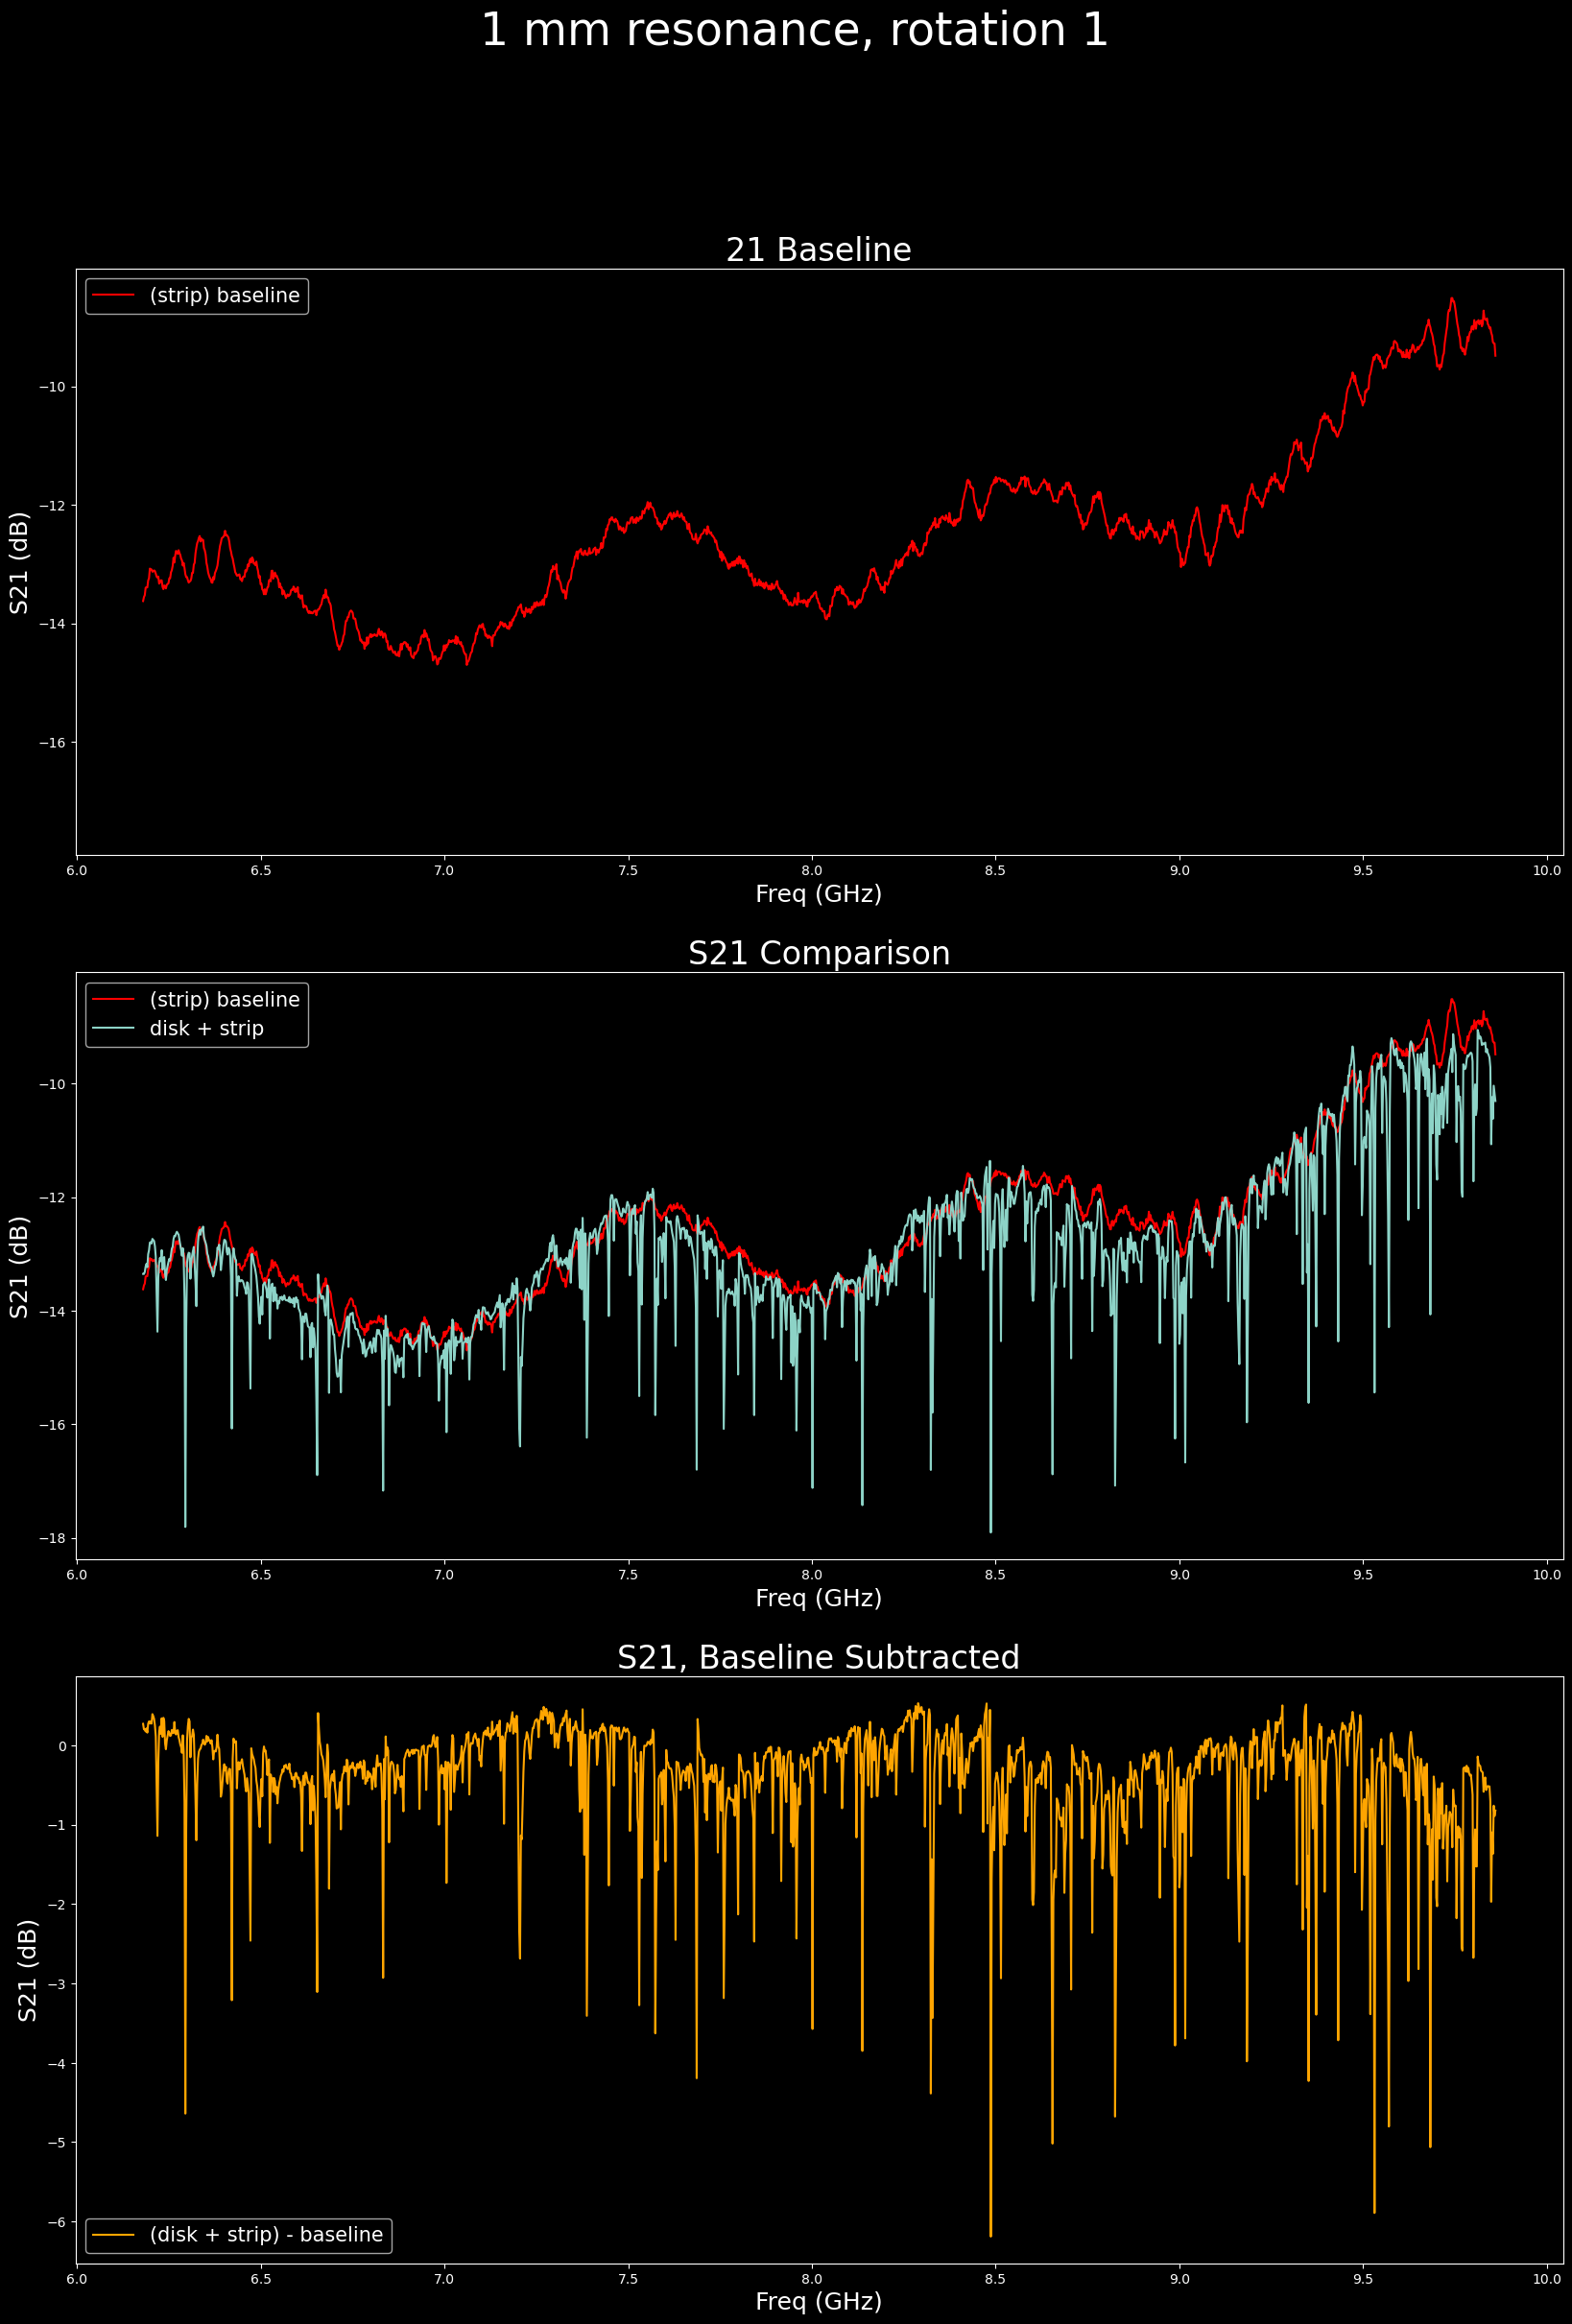

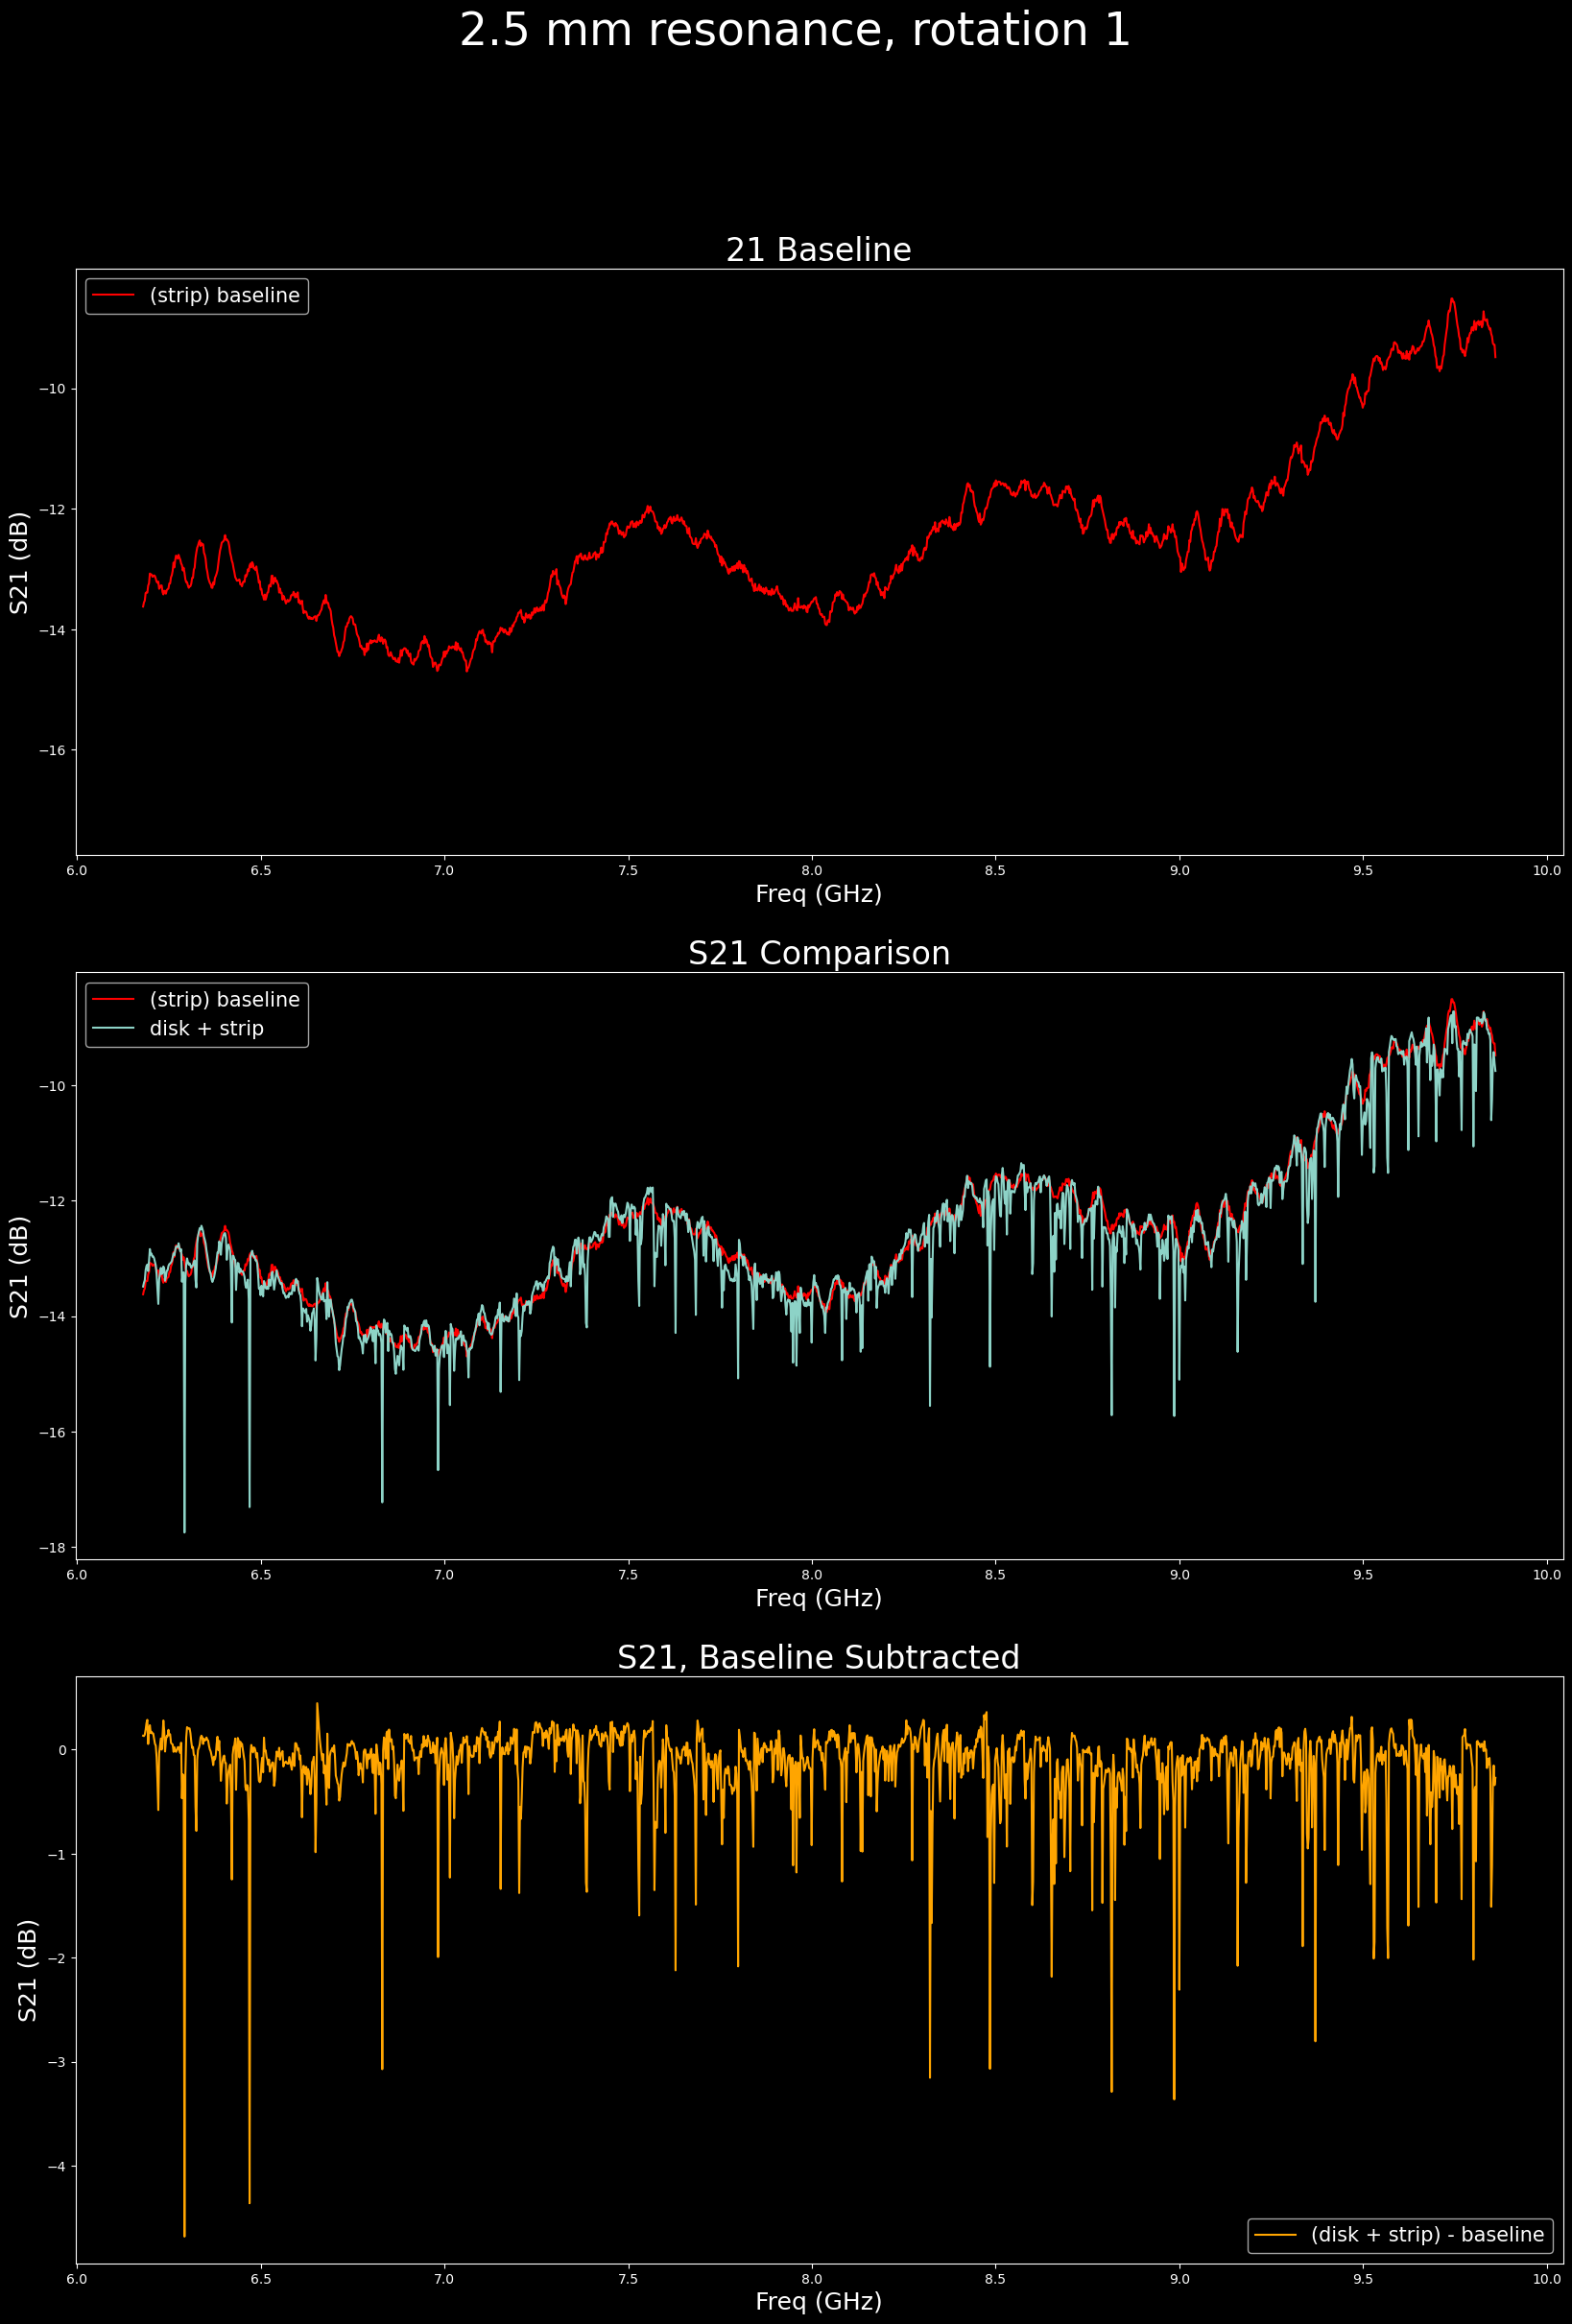

In [41]:
baseline, rot1_sb1_data = vdr.loader_plotter(baseline2, rot1_sb1, 
                                             folder_for_plotter,
                                             title = 'Sub-Millimeter resonance, rotation 1')

baseline, rot1_1mm_data = vdr.loader_plotter(baseline2, rot1_1mm, 
                                             folder_for_plotter, 
                                             title = '1 mm resonance, rotation 1')

baseline, rot1_2p5mm_data = vdr.loader_plotter(baseline2, rot1_2p5mm, 
                                               folder_for_plotter, 
                                               title = '2.5 mm resonance, rotation 1')

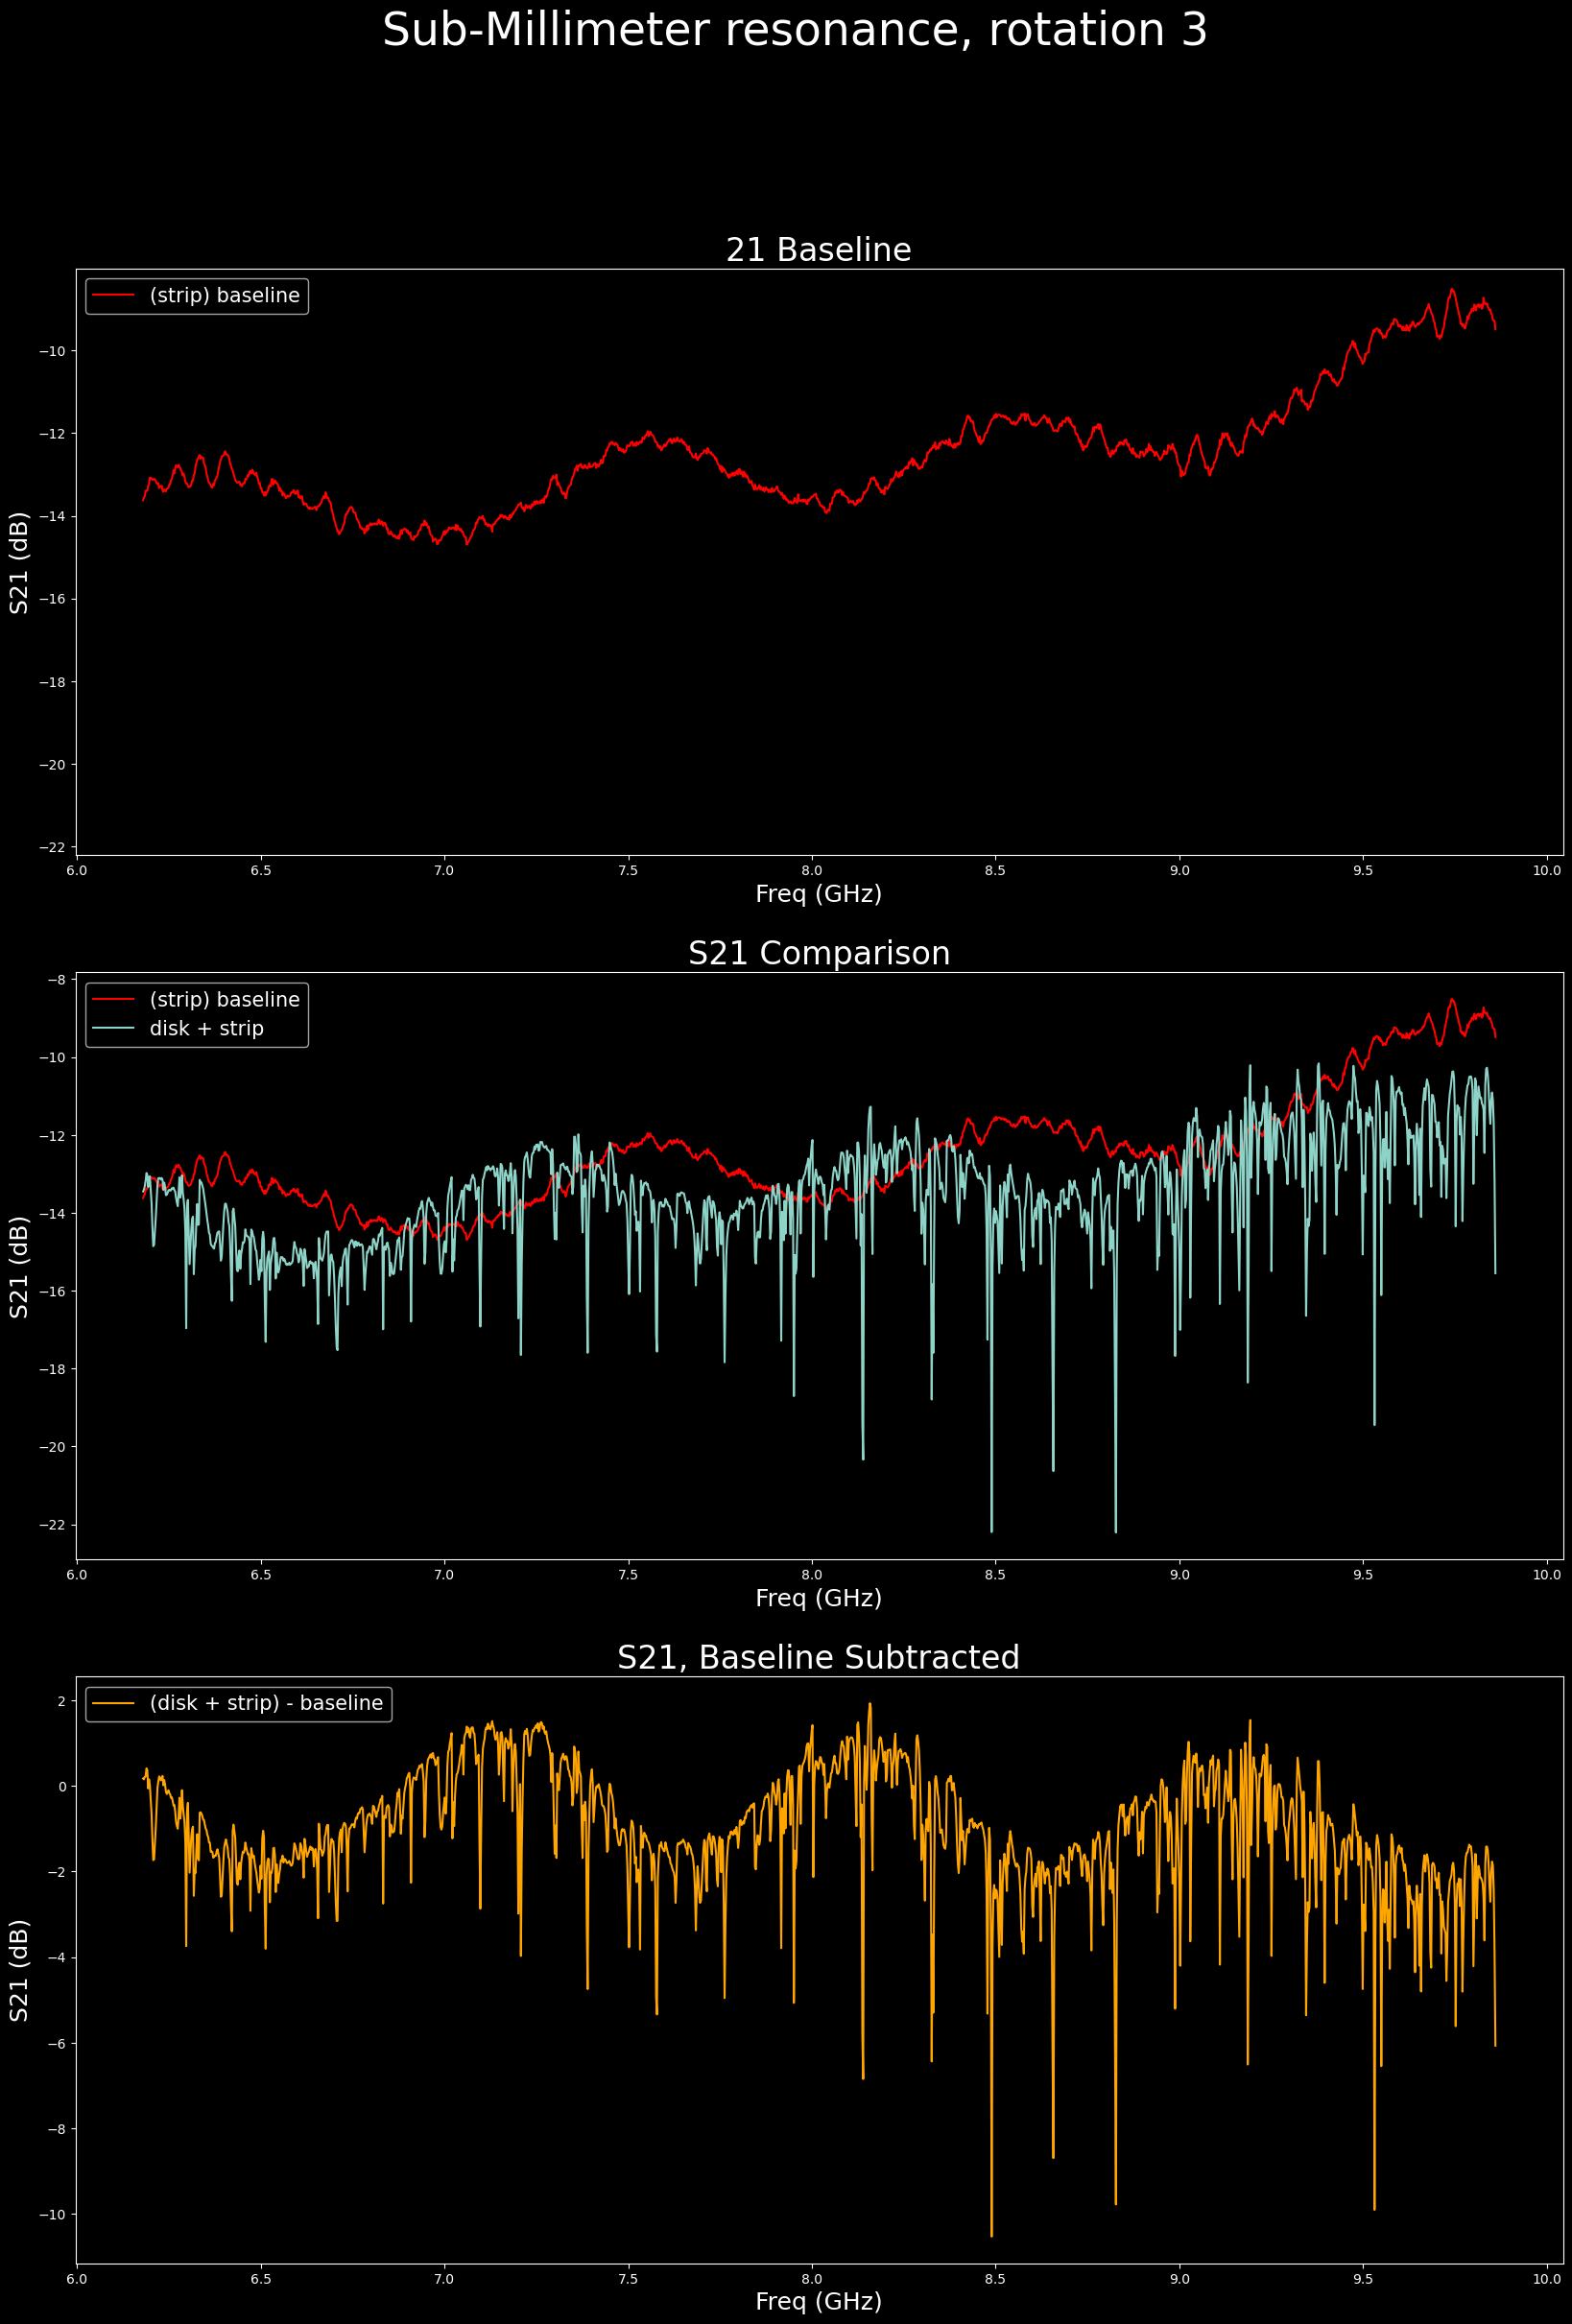

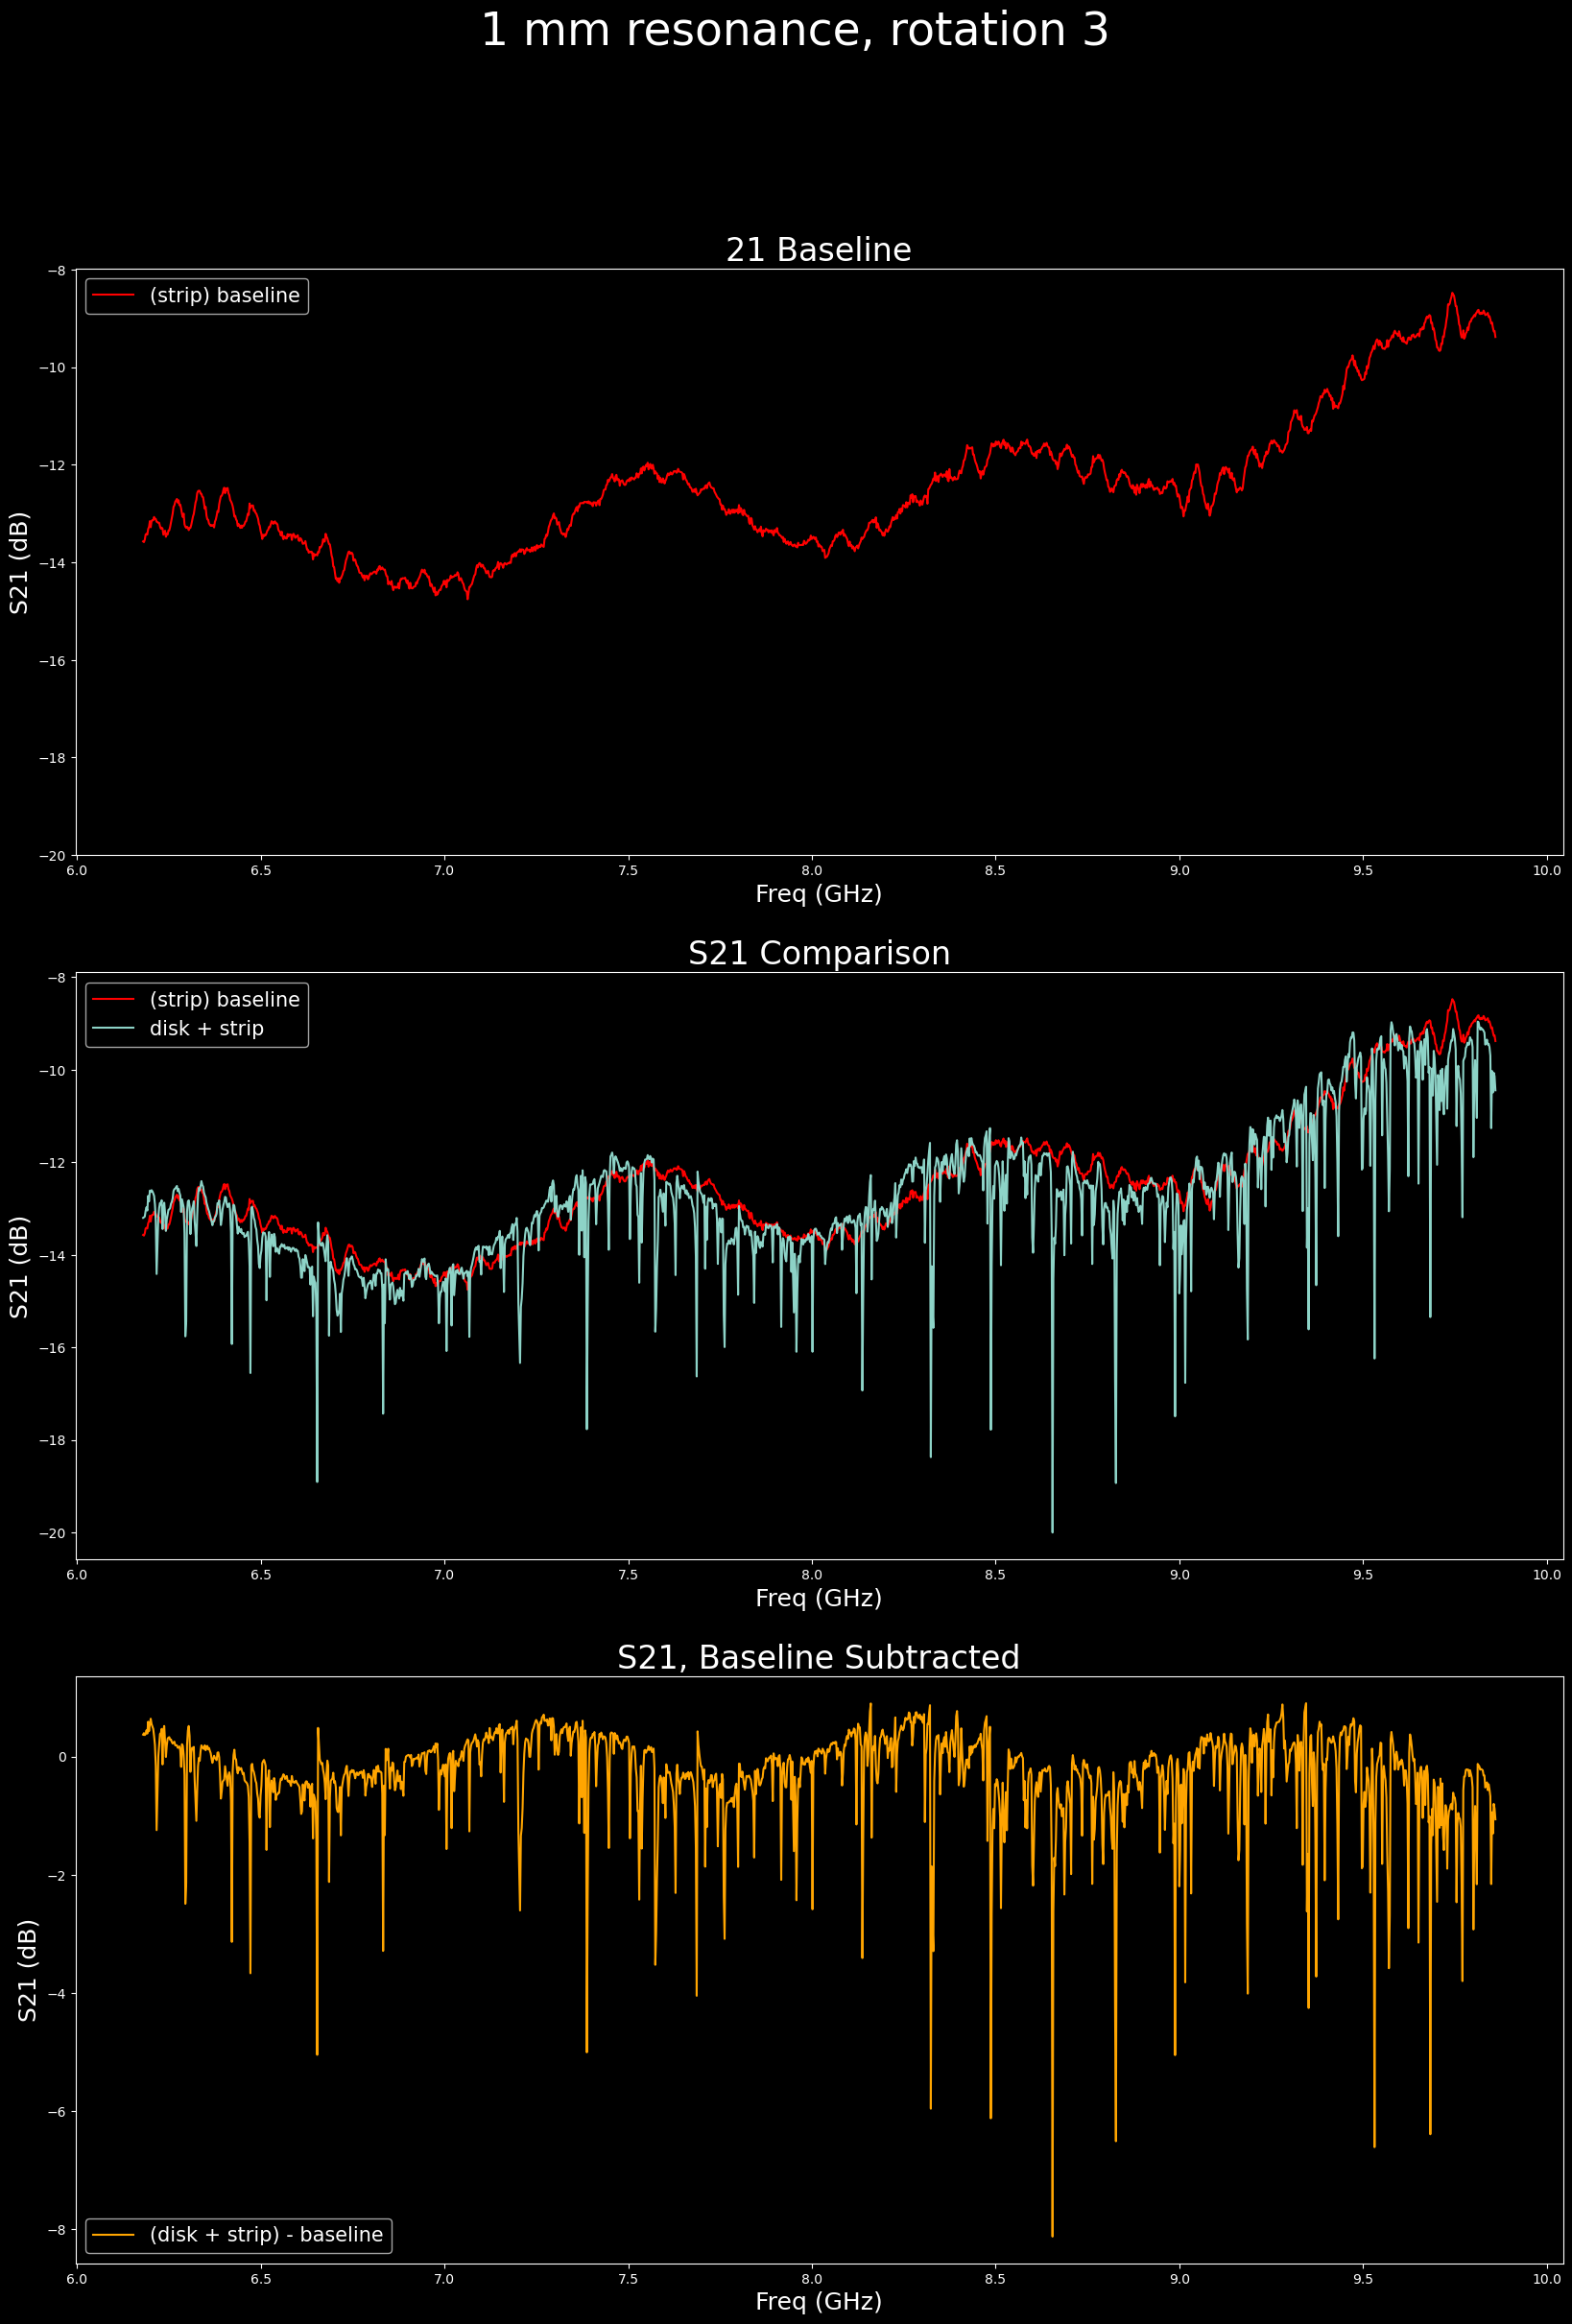

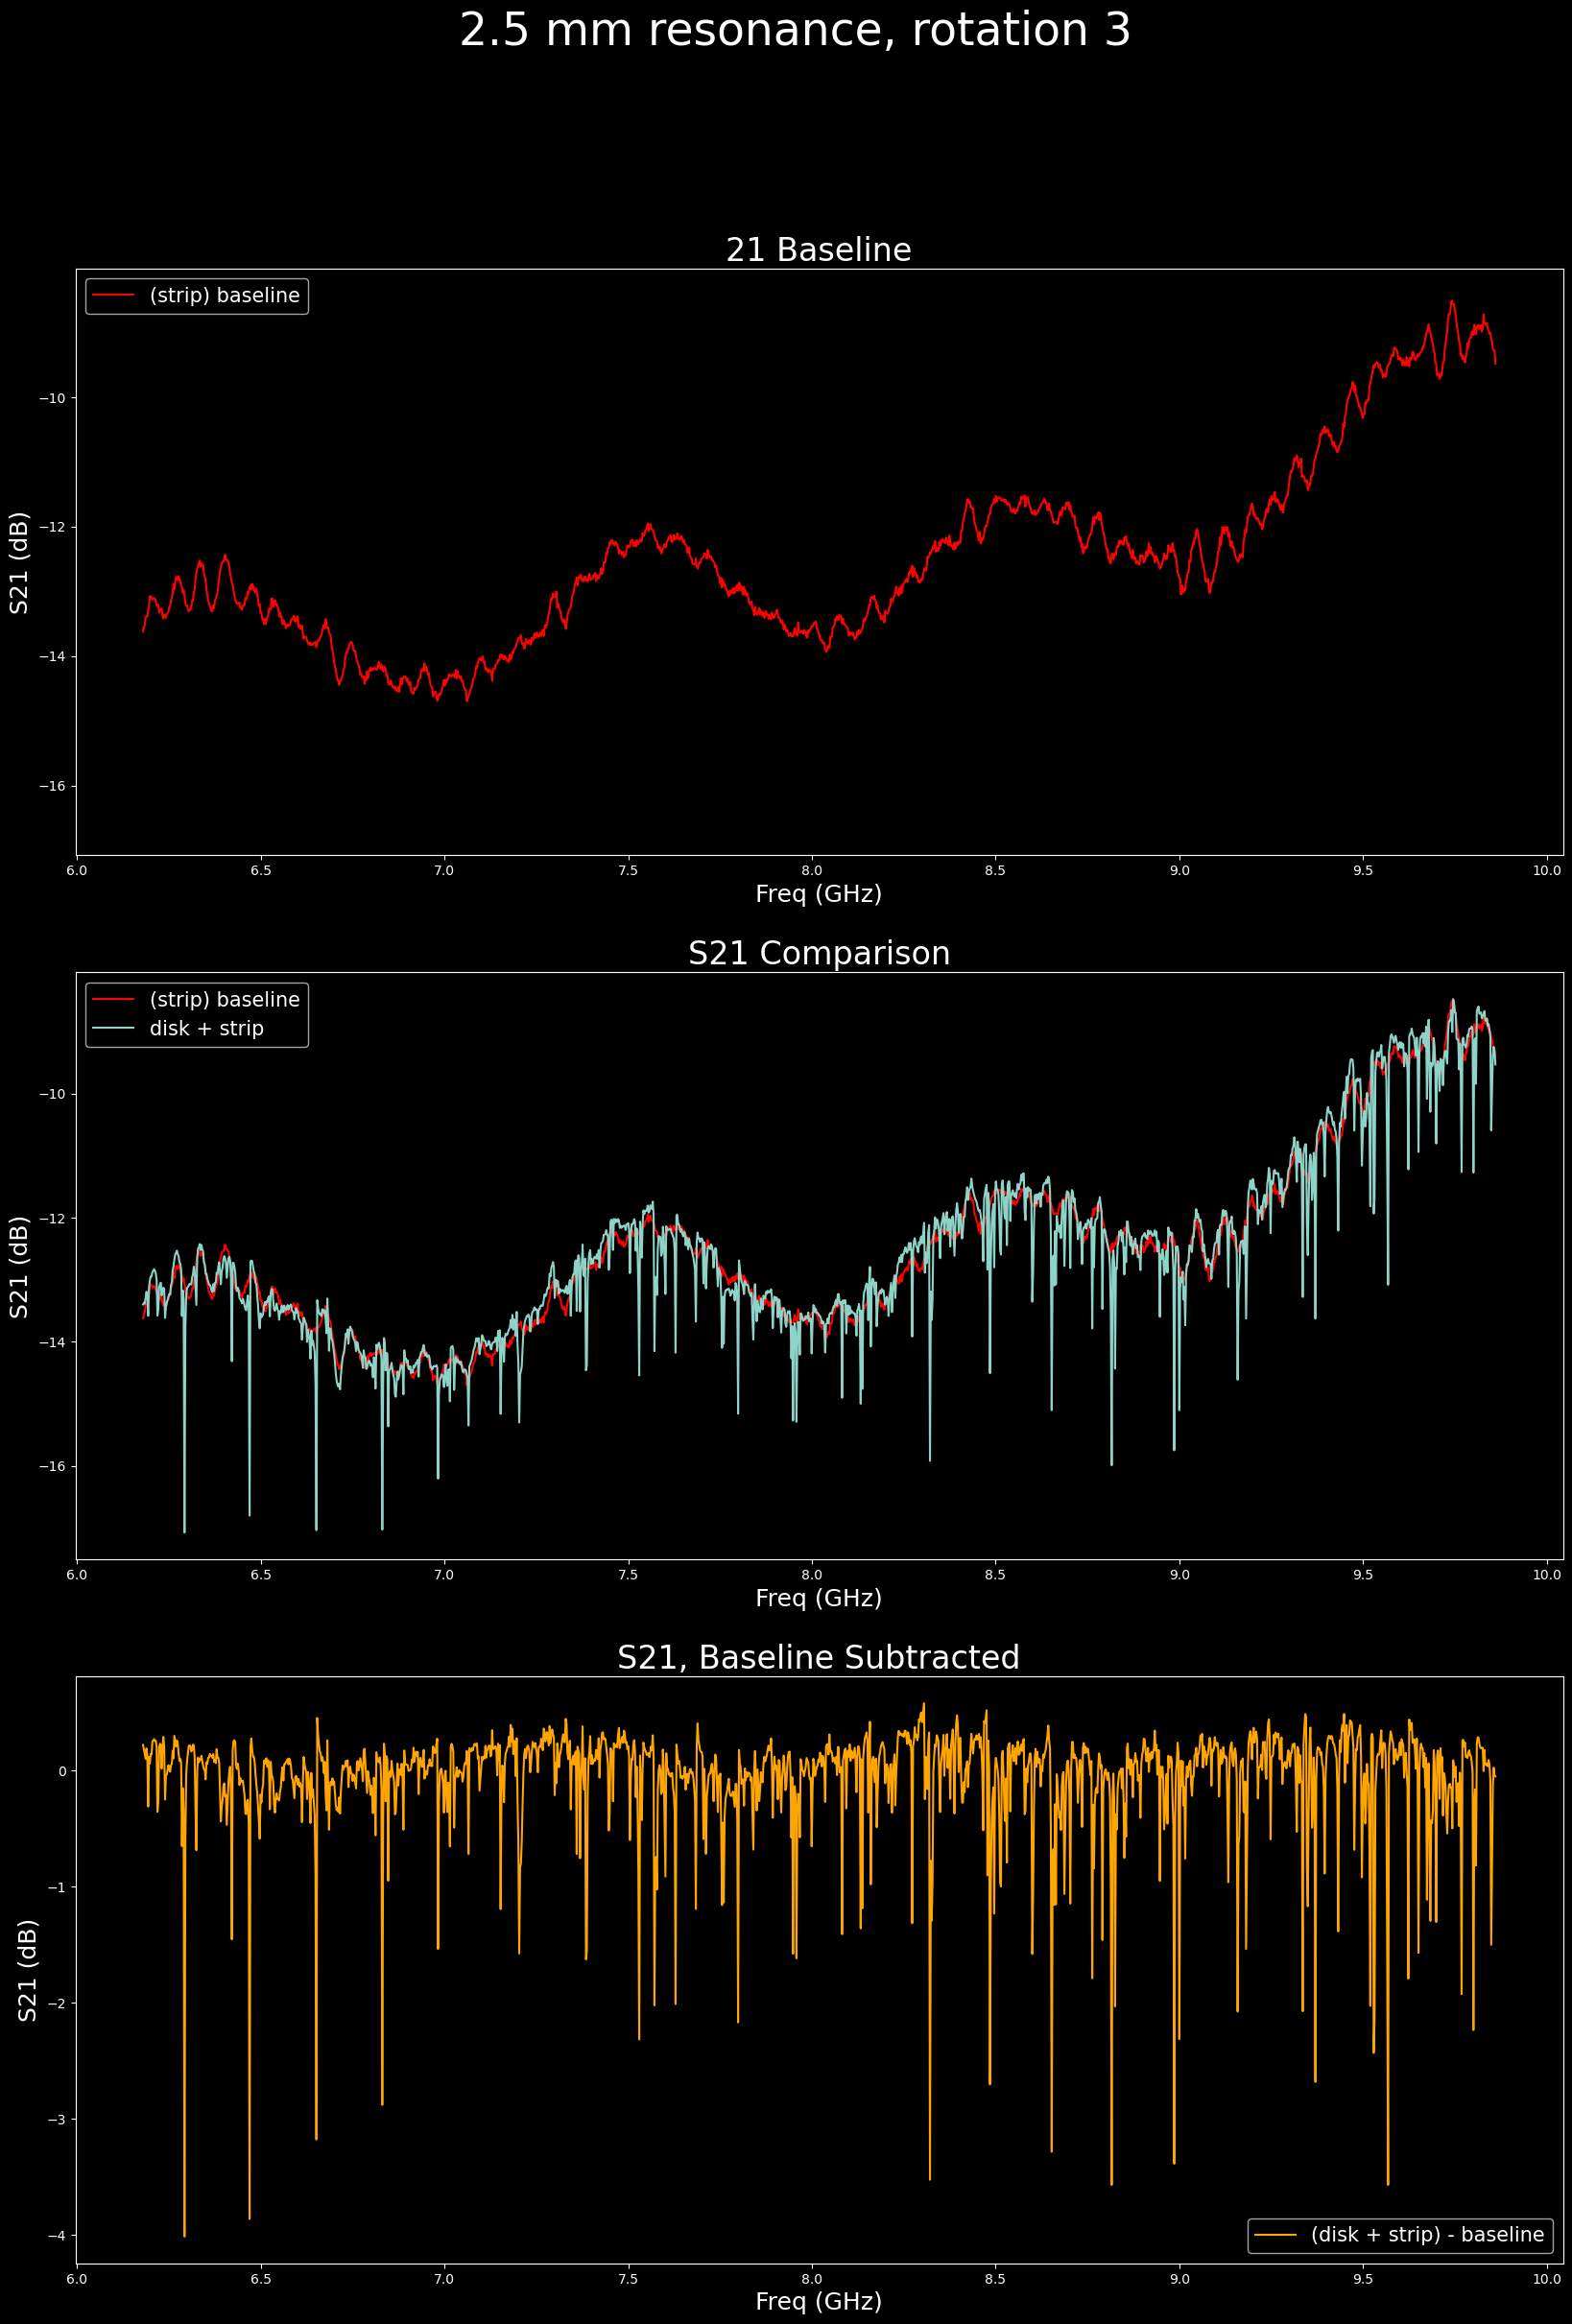

In [31]:
baseline, rot3_sb1_data = vdr.loader_plotter(baseline2, rot3_sb1, 
                                             folder_for_plotter, 
                                             title = 'Sub-Millimeter resonance, rotation 3')

baseline, rot3_1mm_data = vdr.loader_plotter(baseline3, rot3_1mm, 
                                             folder_for_plotter, 
                                             title = '1 mm resonance, rotation 3')

baseline, rot3_2p5mm_data = vdr.loader_plotter(baseline2, rot3_2p5mm, 
                                               folder_for_plotter, 
                                               title = '2.5 mm resonance, rotation 3')

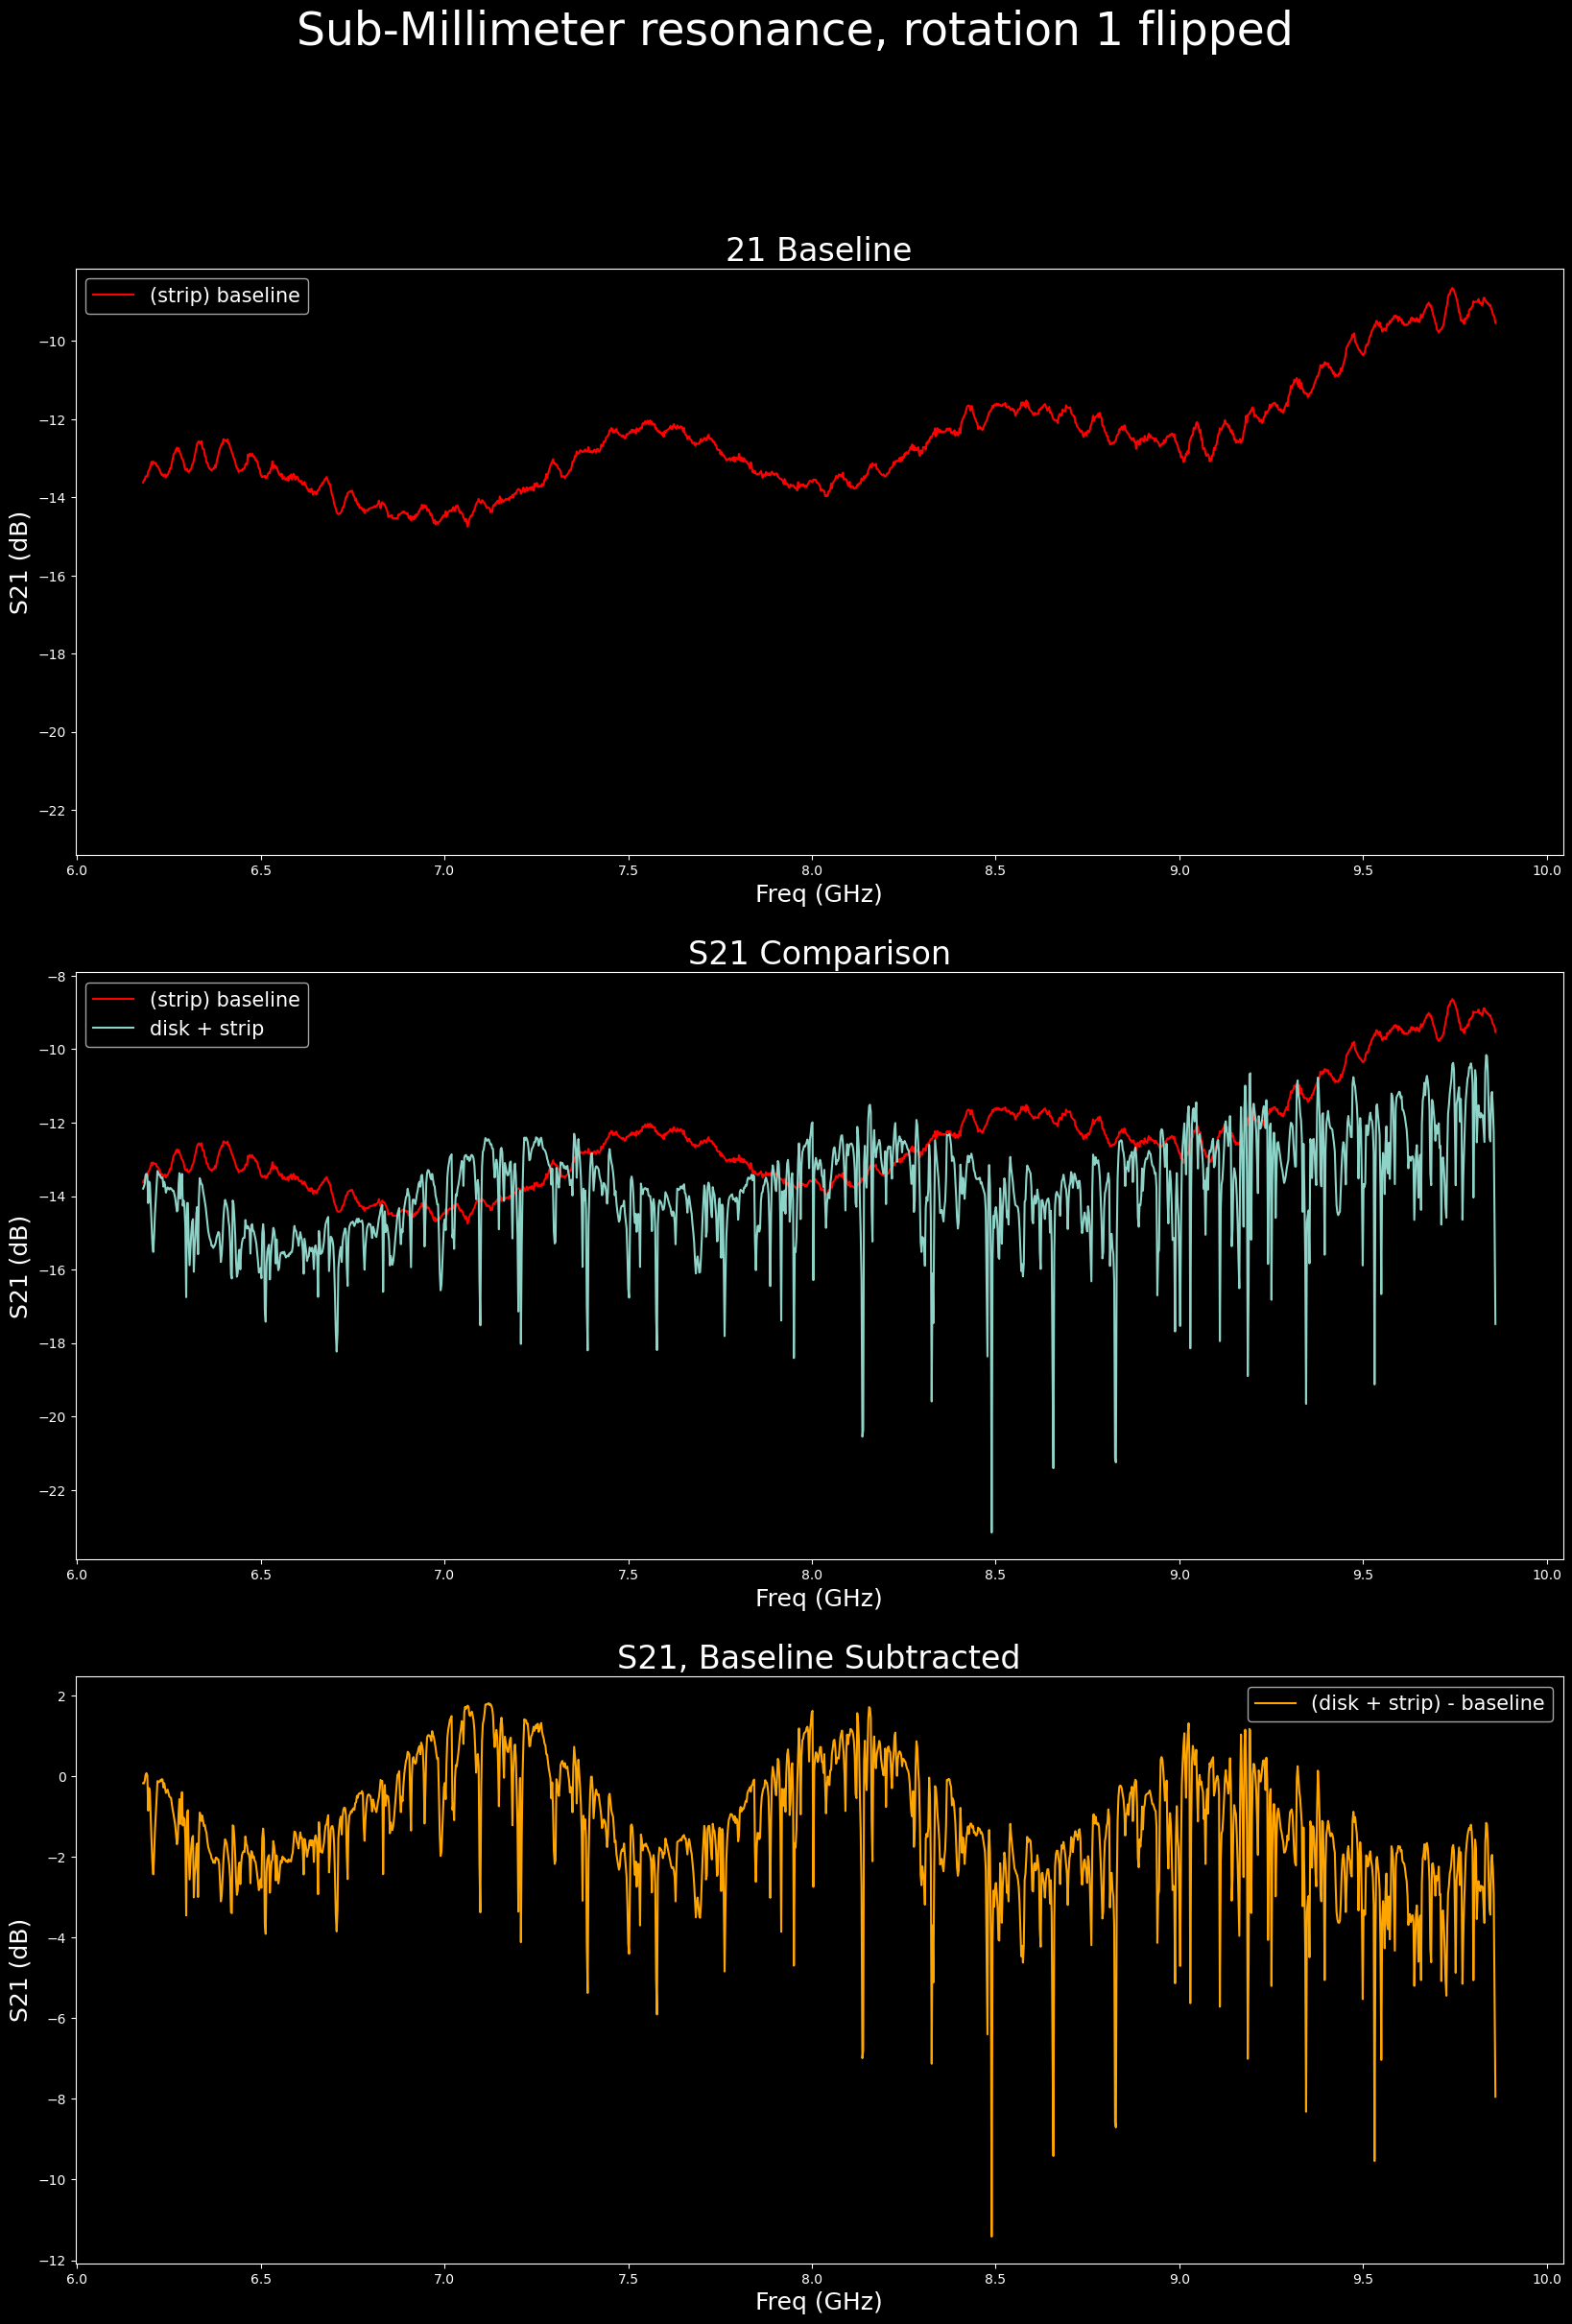

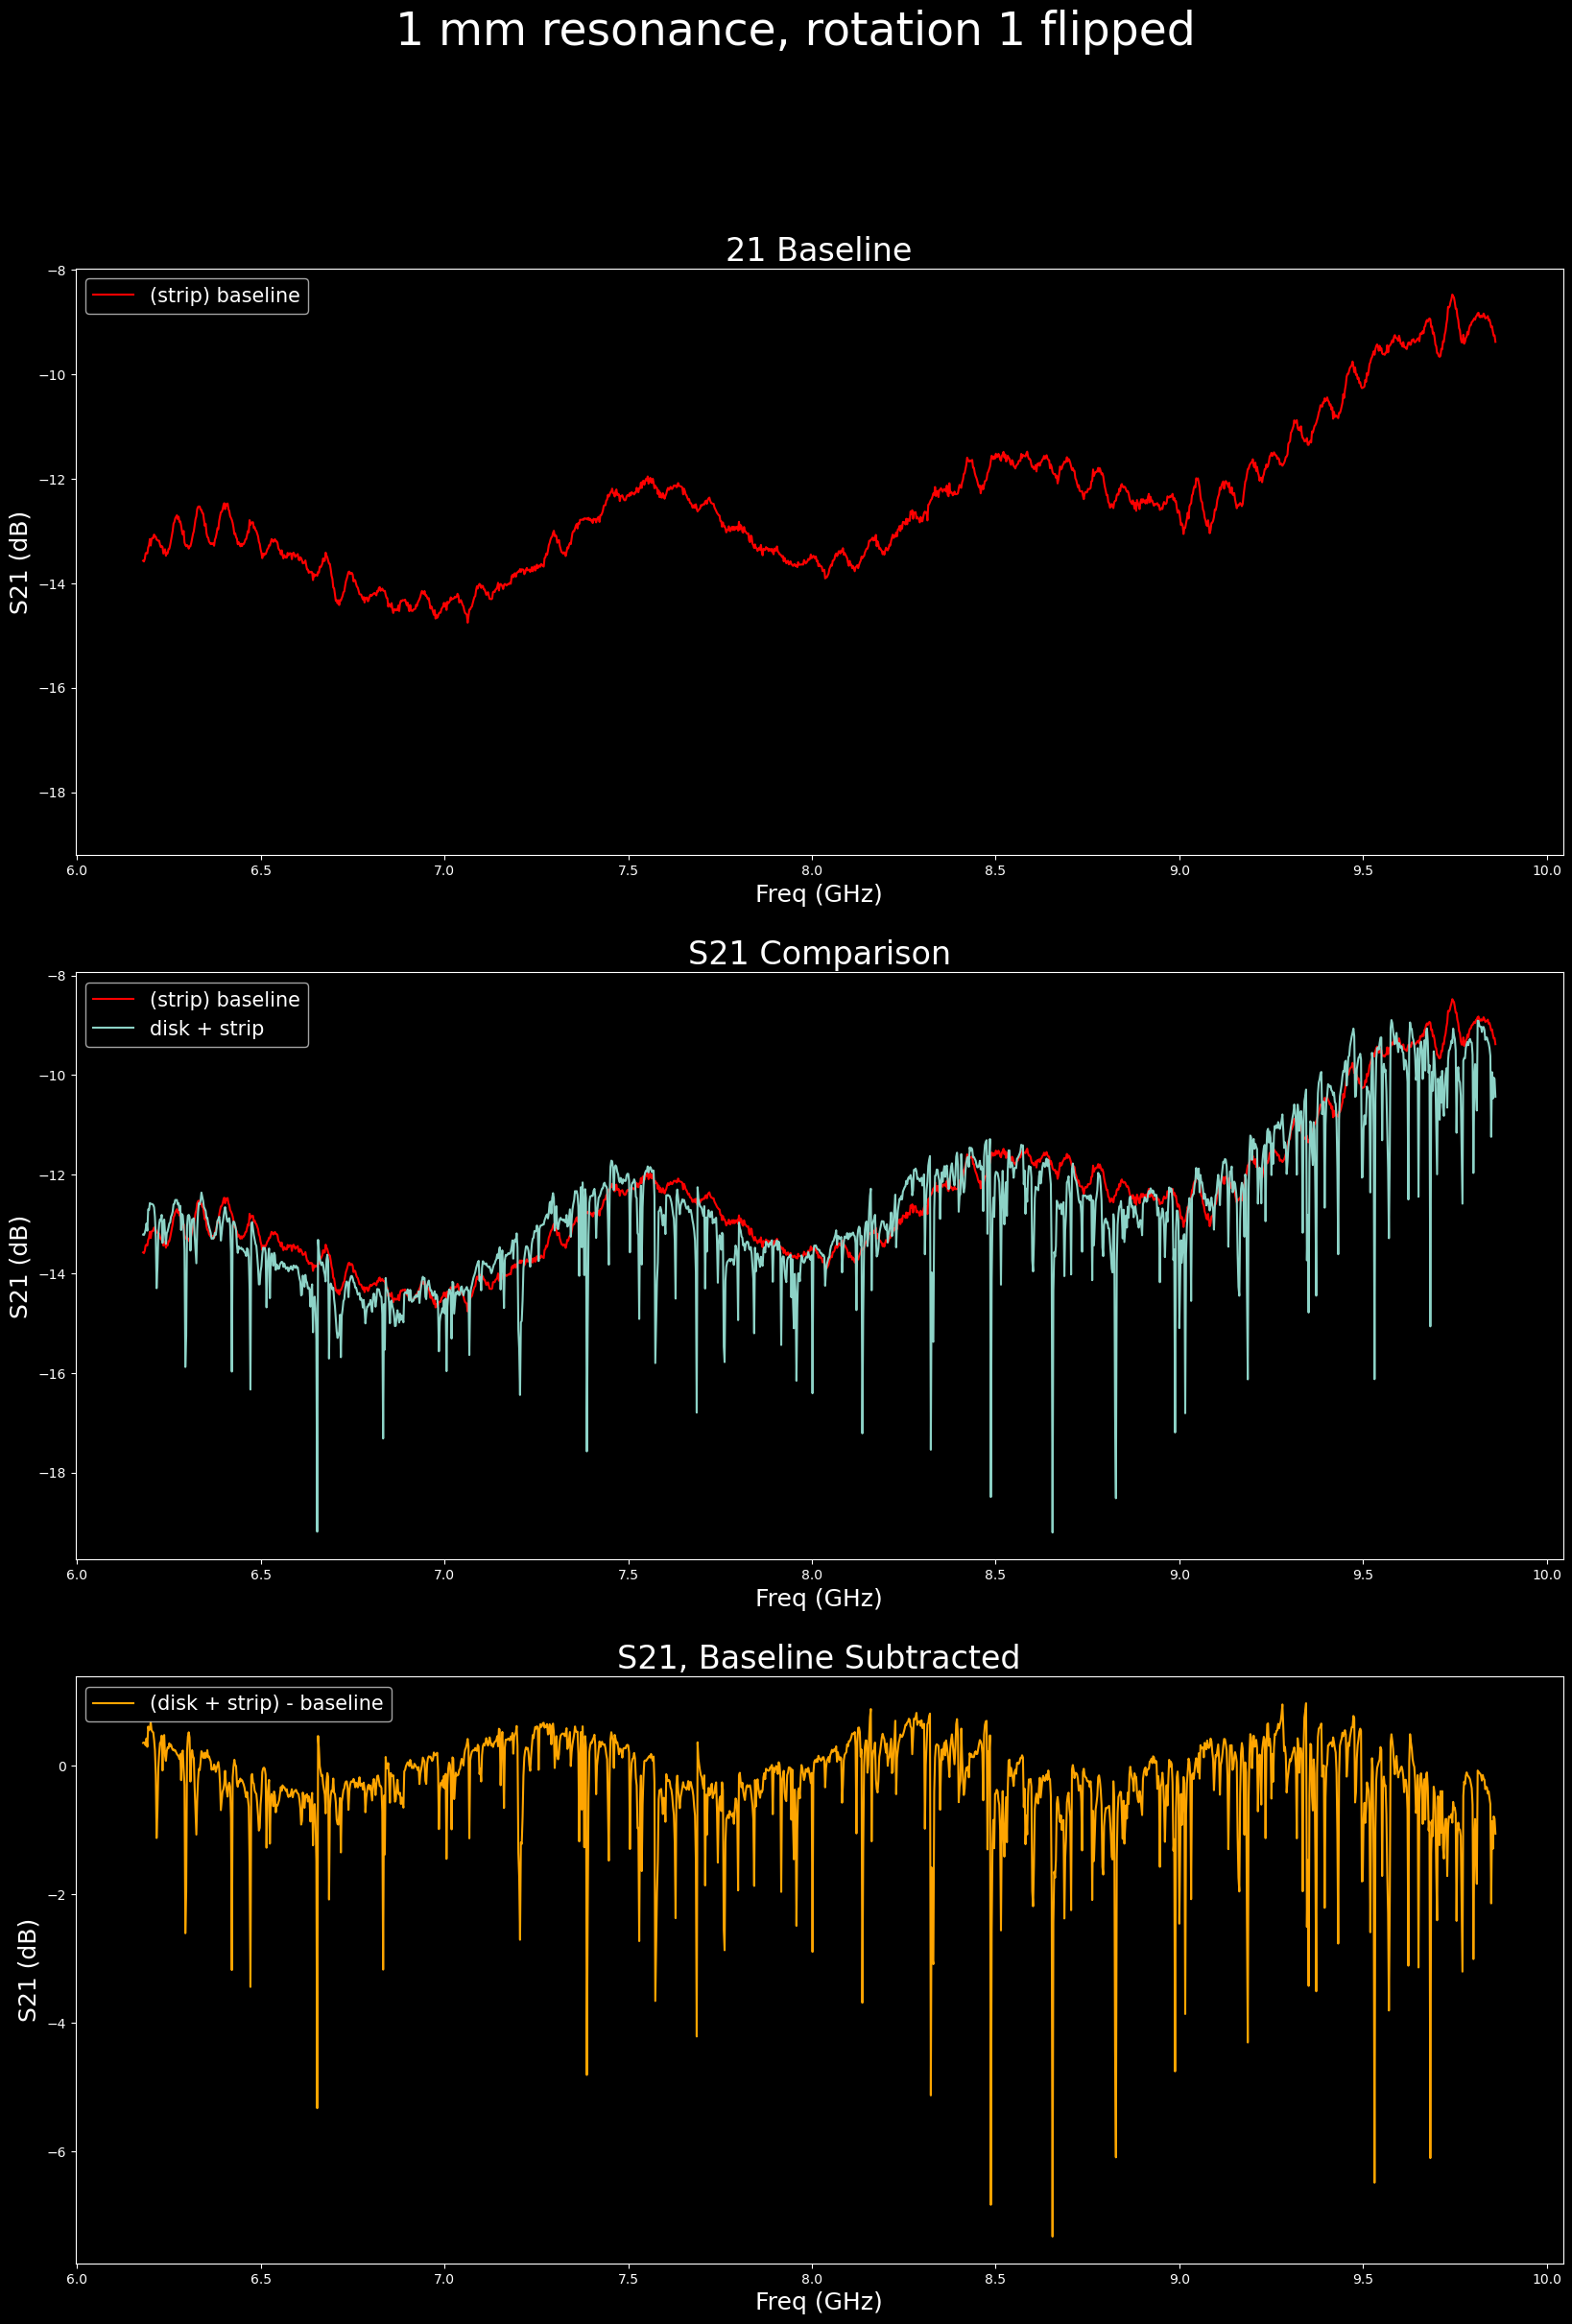

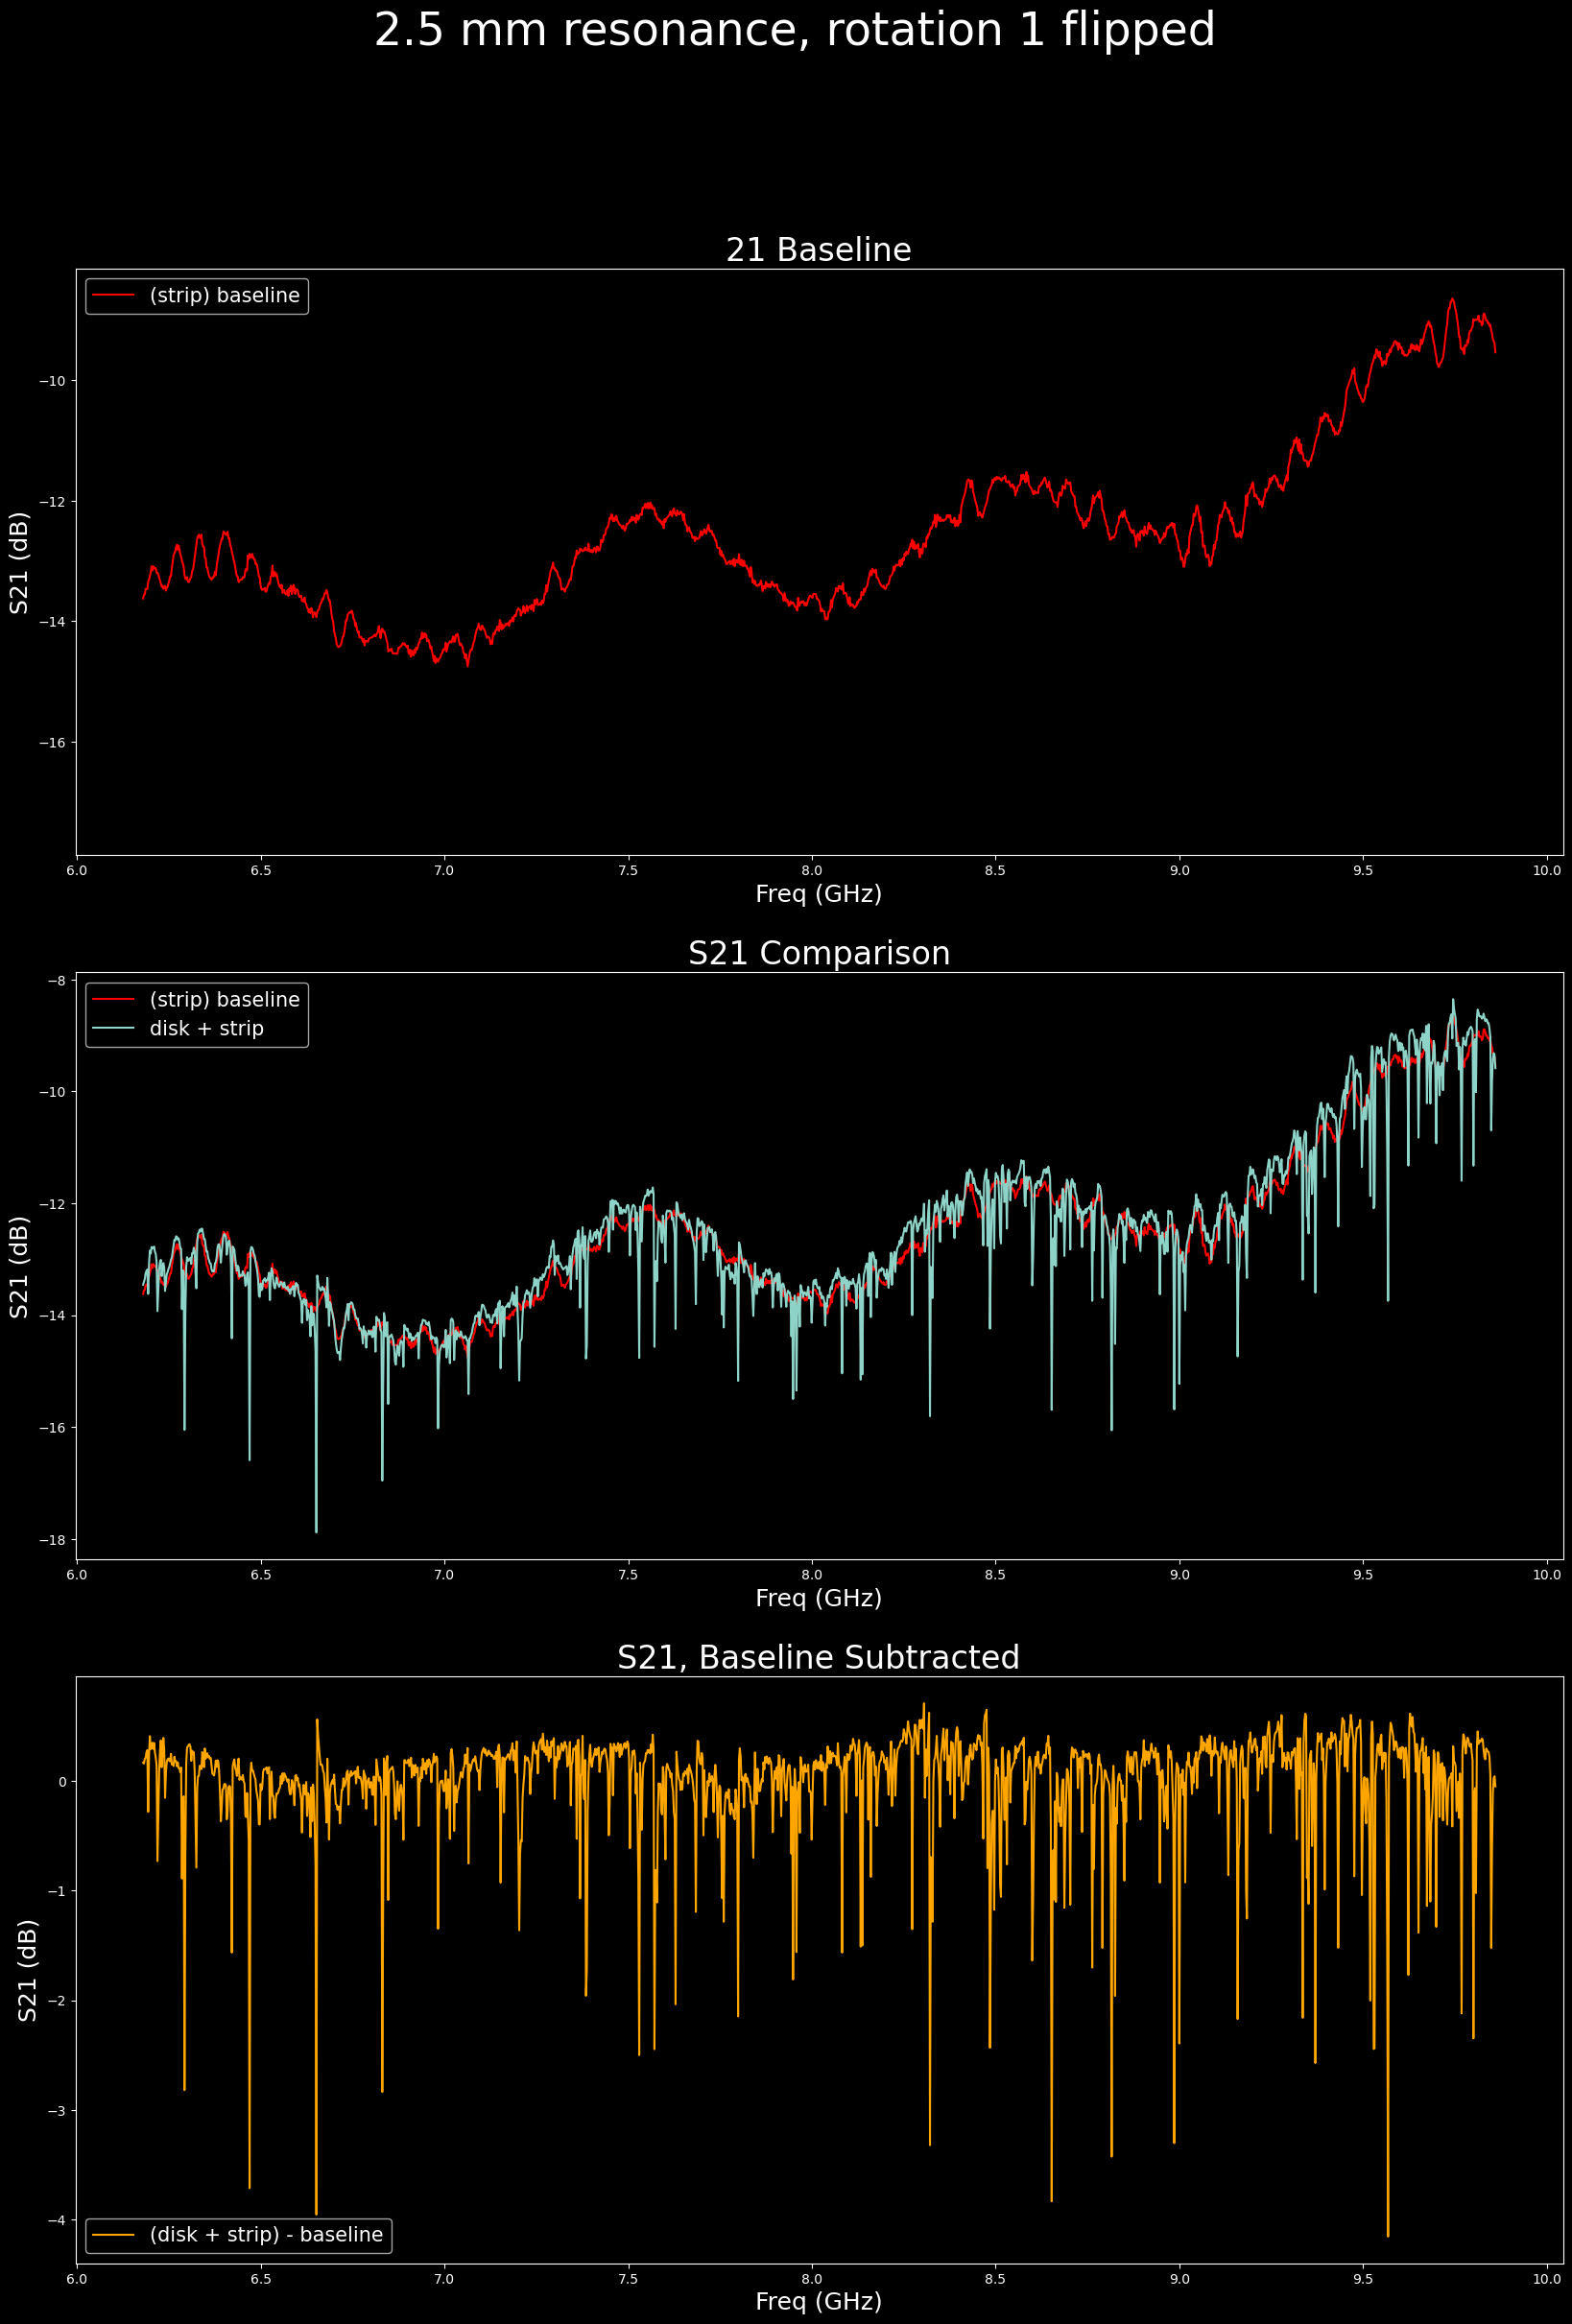

In [42]:
baseline2, rot1fl_sb1_data = vdr.loader_plotter(baseline1, rot1fl_sb1, 
                                                folder_for_plotter, 
                                                title = 'Sub-Millimeter resonance, rotation 1 flipped')

baseline3, rot1fl_1mm_data = vdr.loader_plotter(baseline3, rot1fl_1mm, 
                                                folder_for_plotter, 
                                                title = '1 mm resonance, rotation 1 flipped')

baseline2, rot1fl_2p5mm_data = vdr.loader_plotter(baseline1, rot1fl_2p5mm, 
                                                  folder_for_plotter, 
                                                  title = '2.5 mm resonance, rotation 1 flipped')